In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
from matplotlib.gridspec import GridSpec
from bs4 import BeautifulSoup
import pickle

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
import re

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [8]:
pip install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

     |████████████████████████████████| 7.2MB 4.9MB/s 
     |████████████████████████████████| 25.9MB 1.7MB/s 
     |████████████████████████████████| 10.4MB 50.2MB/s 
     |████████████████████████████████| 11.6MB 48.0MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 24.2MB 64.0MB/s 
     |████████████████████████████████| 573kB 52.6MB/s 
     |████████████████████████████████| 2.2MB 41.9MB/s 
     |████████████████████████████████| 368kB 49.1MB/s 
     |████████████████████████████████| 245kB 47.8MB/s 
     |████████████████████████████████| 6.8MB 51.6MB/s 
     |████████████████████████████████| 1.1MB 37.9MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19529 sha256=66fa4e293a6583115520a046279f32f89a615d57605295cd18969be40977aa6c
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully

# Load data

In [9]:
stack = pd.read_csv('/stack_cleaned.csv')

In [10]:
top_402_tags = pd.read_csv('/top_402_tags.csv')

In [11]:
top_402_tags = list(top_402_tags['0'])
# top_402_tags

In [12]:
# stack.head()

## clean data

In [13]:
# clean tag
tags_cleaned = stack['Tags_cleaned'].str.replace('\', \'', ' ').str.replace('\'', '').str.replace('[', '').str.replace(']', '').apply(lambda x: word_tokenize(x))
tags_cleaned

0               [php, security, hash, password, blowfish]
1                                             [php, null]
2                               [java, spring, hibernate]
3                   [compilerconstruction, bootstrapping]
4                                   [sqlserver, deadlock]
                               ...                       
100423              [javascript, jquery, dom, attr, prop]
100424                                      [bash, alias]
100425                                              [git]
100426    [nginx, docker, reverseproxy, dockernetworking]
100427                        [java, macos, installation]
Name: Tags_cleaned, Length: 100428, dtype: object

In [14]:
stack['Body_title_cleaned']

0         ['last', 'week', 'read', 'lot', 'article', 'pa...
1         ['difference', 'null', 'null', 'php', 'sometim...
2         ['try', 'upgrade', 'hibernate', 'project', 'sp...
3         ['heard', 'idea', 'bootstrapping', 'language',...
4         ['see', 'pernicious', 'rare', 'deadlock', 'con...
                                ...                        
100423    ['jquery', 'new', 'function', 'prop', 'selecto...
100424    ['use', 'use', 'cshell', 'csh', 'let', 'make',...
100425    ['currently', 'three', 'modify', 'file', 'work...
100426    ['nginx', 'run', 'inside', 'docker', 'containe...
100427    ['want', 'program', 'late', 'javafx', 'require...
Name: Body_title_cleaned, Length: 100428, dtype: object

In [15]:
# clean body_title
body_title = stack['Body_title_cleaned'].str.replace('\', \'', ' ').str.replace('\'', '').str.replace('[', '').str.replace(']', '')
body_title

0         last week read lot article password hash blowf...
1         difference null null php sometimes seem interc...
2         try upgrade hibernate project spring version u...
3         heard idea bootstrapping language write compil...
4         see pernicious rare deadlock condition stack o...
                                ...                        
100423    jquery new function prop selector click functi...
100424    use use cshell csh let make alias take paramet...
100425    currently three modify file work directory how...
100426    nginx run inside docker container mysql run lo...
100427    want program late javafx require java use inte...
Name: Body_title_cleaned, Length: 100428, dtype: object

In [16]:
# clean body
body = stack['Body_cleaned'].str.replace('\', \'', ' ').str.replace('\'', '').str.replace('[', '').str.replace(']', '')
body

0         last week read lot article password hash blowf...
1         difference null null php sometimes seem interc...
2         try upgrade hibernate project spring version u...
3         heard idea bootstrapping language write compil...
4         see pernicious rare deadlock condition stack o...
                                ...                        
100423    jquery new function prop selector click functi...
100424    use use cshell csh let make alias take paramet...
100425    currently three modify file work directory how...
100426    nginx run inside docker container mysql run lo...
100427    want program late javafx require java use inte...
Name: Body_cleaned, Length: 100428, dtype: object

In [17]:
# clean title
title = stack['Title_cleaned'].str.replace('\', \'', ' ').str.replace('\'', '').str.replace('[', '').str.replace(']', '')
title

0                     hash long password character blowfish
1                                  difference null null php
2                                   hibernatesequence exist
3               bootstrapping still require outside support
4                              diagnose deadlock sql server
                                ...                        
100423                                          prop v attr
100424                       make bash alias take parameter
100425                               hard reset single file
100426    inside docker container connect localhost machine
100427                                     install java mac
Name: Title_cleaned, Length: 100428, dtype: object

## token

In [18]:
# tokenize body_title
body_title_token = body_title.apply(lambda x: word_tokenize(x))
body_title_token

0         [last, week, read, lot, article, password, has...
1         [difference, null, null, php, sometimes, seem,...
2         [try, upgrade, hibernate, project, spring, ver...
3         [heard, idea, bootstrapping, language, write, ...
4         [see, pernicious, rare, deadlock, condition, s...
                                ...                        
100423    [jquery, new, function, prop, selector, click,...
100424    [use, use, cshell, csh, let, make, alias, take...
100425    [currently, three, modify, file, work, directo...
100426    [nginx, run, inside, docker, container, mysql,...
100427    [want, program, late, javafx, require, java, u...
Name: Body_title_cleaned, Length: 100428, dtype: object

List of additional stop words identified using LDA and NMF (top 20 words for eah topic)

In [19]:
list_stop_words = ['exist',
  'name',
  'annotation',
 'url',
 'view',
 'set',
 'header',
 'color',
 'remove',
 'button',
 'post',
 'page',
 'default',
 'delete',
 'scroll',
 'size',
 'list',
 'number',
 'format',
 'loop',
 'select',
 'sort',
 'set',
 'new',
 'find',
 'one',
 'row',
 'use',
 'object',
 'class',
 'method',
 'test',
 'property',
 'exception',
 'set',
 'variable',
 'type',
 'way',
 'interface',
 'reference',
 'scope',
 'parameter',
 'file',
 'error',
 'directory',
 'path',
 'difference',
 'build',
 'package',
 'code',
 'find',
 'project',
 'configuration',
 'install',
 'log',
 'function',
 'import',
 'get',
 'module',
 'call',
 'work',
 'argument',
 'user',
 'find',
 'variable',
 'int',
 'name',
 'line',
 'data',
 'create',
 'version',
 'log',
 'field',
 'without',
 'library',
 'folder',
 'struct',
 'store',
 'fail',
 'warn',
 'task',
 'change',
 'return',
 'vector',
 'view',
 'item',
 'link',
 'message',
 'button',
 'space',
 'custom',
 'set',
 'string',
 'type',
 'value',
 'table',
 'column',
 'select',
 'convert',
 'integer',
 'check',
 'multiple',
 'index',
 'parameter',
 'input',
 'function',
 'form',
 'type',
 'element',
 'event',
 'button',
 'update',
 'select',
 'make',
 'character',
 'class',
 'add',
 'run',
 'template',
 'application',
 'std',
 'current',
 'type',
 'rail',
 'program',
 'search',
 'go',
 'time',
 'date',
 'long',
 'lot',
 'heard',
 'want',
 'late',
 'modify',
 'see',
 'try',
 'seem',
 'sometimes',
 'let',
 'instead',
 'however',
 'inside',
 'require',
 'last',
 'found',
 'rare',
 'take',
 'three',
 'something',
 'like',
 'read']

In [20]:
# remove the above stopwords from tokenized body_title
body_title_token_stops = body_title_token.apply(lambda x: [w for w in x if w not in list_stop_words])

In [21]:
body_title_token_stops

0         [week, article, password, hash, blowfish, best...
1         [null, null, php, interchangeable, edit, reaso...
2         [upgrade, hibernate, spring, upgrade, follow, ...
3         [idea, bootstrapping, language, write, compile...
4         [pernicious, deadlock, condition, stack, overf...
                                ...                        
100423    [jquery, prop, selector, click, thisgetattribu...
100424    [cshell, csh, alias, notation, alias, junk, mv...
100425    [currently, reset, head, status, svn, svn, rev...
100426    [nginx, docker, container, mysql, localhost, c...
100427    [javafx, java, intellij, ce, mac, o, x, maveri...
Name: Body_title_cleaned, Length: 100428, dtype: object

In [22]:
# tokenized body
body_token = body.apply(lambda x: word_tokenize(x))
body_token

0         [last, week, read, lot, article, password, has...
1         [difference, null, null, php, sometimes, seem,...
2         [try, upgrade, hibernate, project, spring, ver...
3         [heard, idea, bootstrapping, language, write, ...
4         [see, pernicious, rare, deadlock, condition, s...
                                ...                        
100423    [jquery, new, function, prop, selector, click,...
100424    [use, use, cshell, csh, let, make, alias, take...
100425    [currently, three, modify, file, work, directo...
100426    [nginx, run, inside, docker, container, mysql,...
100427    [want, program, late, javafx, require, java, u...
Name: Body_cleaned, Length: 100428, dtype: object

In [23]:
# tokenized title
title_token = title.apply(lambda x: word_tokenize(x))
title_token

0               [hash, long, password, character, blowfish]
1                             [difference, null, null, php]
2                                [hibernatesequence, exist]
3         [bootstrapping, still, require, outside, support]
4                         [diagnose, deadlock, sql, server]
                                ...                        
100423                                      [prop, v, attr]
100424                 [make, bash, alias, take, parameter]
100425                          [hard, reset, single, file]
100426    [inside, docker, container, connect, localhost...
100427                                 [install, java, mac]
Name: Title_cleaned, Length: 100428, dtype: object

## filter body_title

Filter Body and Title to keep only words:
  - in top_402_tags

  - OR in both Title and Body

In [24]:
lists_list=[]
for i in range(len(stack)):
  lists = [word for word in body_title_token_stops[i] if ((word in top_402_tags) \
                                                               or (word in body_token[i] and word in title_token[i]))]
  lists_list.append(lists)
  

In [25]:
list_concat=[]
for l in lists_list:
  for e in l:
    list_concat.append(e)
print(len(list_concat), len(set(list_concat)))

1140577 19073


There are 19073 unique words in the corpus after preprocessing.

In [26]:
# transform list to pandas series
body_title_token_filter =  pd.Series(lists_list)

In [27]:
# join list
body_title_filter = body_title_token_filter.apply(lambda x: ' '.join(x))
body_title_filter

0         password hash blowfish hash algorithm blowfish...
1                               null null php null null php
2                                          hibernate spring
3         bootstrapping assembly bootstrapping outside s...
4         deadlock sql server database deadlock deadlock...
                                ...                        
100423    jquery prop prop attr prop attr prop attr scri...
100424                     alias alias bash bash bash alias
100425    reset svn svn svn git git reset hard single gi...
100426    nginx docker container mysql localhost connect...
100427    java mac oracle java java java java java oracl...
Length: 100428, dtype: object

# LDA

## Best n_components

In [ ]:
sample_data = body_title_filter[:10000]

In [ ]:
score = {}
perplexity = {}
coherence = {}

for k in np.linspace(5,60,12):

  # Use tf (raw term count) features for LDA.
  print("Extracting tf features for LDA...")
  tf_vectorizer = CountVectorizer(max_df=0.85, min_df=2,
                                  max_features=1000,
                                  stop_words='english')
  t0 = time()
  tf = tf_vectorizer.fit_transform(sample_data)
  print("done in %0.3fs." % (time() - t0))
  print()

  print('\n' * 2, "Fitting LDA models with tf features, "
        "n_components=%d and n_features=%d..."
        % (k, 10000))
  lda = LatentDirichletAllocation(n_components=int(k), max_iter=5,
                                  learning_method='online',
                                  learning_offset=50.,
                                  random_state=0)
  t0 = time()
  lda.fit(tf)
  print("done in %0.3fs." % (time() - t0))

  tf_feature_names = tf_vectorizer.get_feature_names()
  # plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

  score[k] = lda.score(tf)
  perplexity[k] = lda.perplexity(tf)
  coherence[k] = metric_coherence_gensim(measure='c_v', 
                        top_n=30, 
                        topic_word_distrib=lda.components_, 
                        dtm=tf, 
                        vocab=np.array(tf_feature_names), 
                        texts=sample_data.apply(lambda x : word_tokenize(x)),
                        return_mean=True)

Extracting tf features for LDA...
done in 0.117s.



 Fitting LDA models with tf features, n_components=5 and n_features=10000...
done in 5.545s.
Extracting tf features for LDA...
done in 0.107s.



 Fitting LDA models with tf features, n_components=10 and n_features=10000...
done in 4.868s.
Extracting tf features for LDA...
done in 0.107s.



 Fitting LDA models with tf features, n_components=15 and n_features=10000...
done in 4.875s.
Extracting tf features for LDA...
done in 0.107s.



 Fitting LDA models with tf features, n_components=20 and n_features=10000...
done in 5.112s.
Extracting tf features for LDA...
done in 0.107s.



 Fitting LDA models with tf features, n_components=25 and n_features=10000...
done in 5.387s.
Extracting tf features for LDA...
done in 0.108s.



 Fitting LDA models with tf features, n_components=30 and n_features=10000...
done in 5.546s.
Extracting tf features for LDA...
done in 0.109s.



 Fitting LDA models with tf features, n_components=35 and n_featur

In [ ]:
coherence

{5.0: 0.3808976296248774,
 10.0: 0.4957023871513521,
 15.0: 0.520187738807974,
 20.0: 0.5658072799554734,
 25.0: 0.5839439679073257,
 30.0: 0.5910660099760662,
 35.0: 0.5989907124061908,
 40.0: 0.6011484289595689,
 45.0: 0.5884372431660085,
 50.0: 0.5791047920208757,
 55.0: 0.5727007118885449,
 60.0: 0.5746862385616308}

In [ ]:
perplexity

{5.0: 355.2352012359873,
 10.0: 287.3359093361092,
 15.0: 245.99518075474506,
 20.0: 218.42915382362753,
 25.0: 200.08966909155714,
 30.0: 186.9220230435266,
 35.0: 174.77718234868095,
 40.0: 170.14566274273201,
 45.0: 163.95214928727432,
 50.0: 157.20785921532897,
 55.0: 162.95464783728886,
 60.0: 154.6873963066586}

Text(0, 0.5, 'coherence score')

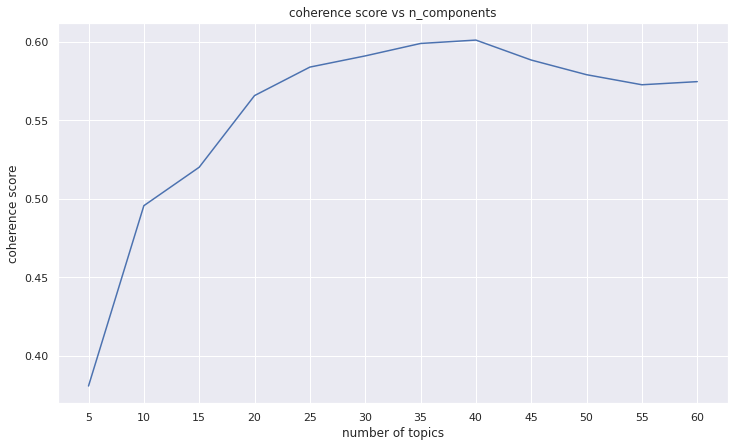

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(np.linspace(5,60,12), list(coherence.values()))
plt.xticks(list(coherence.keys()))
plt.title('coherence score vs n_components')
plt.xlabel('number of topics')
plt.ylabel('coherence score')

## LDA_model

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(40, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

In [ ]:
all_data = body_title_filter

In [ ]:
n_top_words=20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=.15, min_df=20,
                                max_features=10000,
                                token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                stop_words='english'
                                )
t0 = time()
tf = tf_vectorizer.fit_transform(all_data)
print("done in %0.3fs." % (time() - t0))
print()

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (100000, 7000))
lda = LatentDirichletAllocation(n_components=15, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.1)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
done in 1.081s.



 Fitting LDA models with tf features, n_samples=100000 and n_features=7000...
done in 45.689s.


In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
diff=[]
for w in tf_feature_names:
  if w in top_402_tags:
    diff.append(w)

In [ ]:
len(diff)

279

In [ ]:
# for w in top_402_tags:
#   if w not in diff:
#     print(w)

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1MB 4.7MB/s 
ERROR: tmtoolkit 0.10.0 has requirement matplotlib<3.4,>=3.3.0, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3


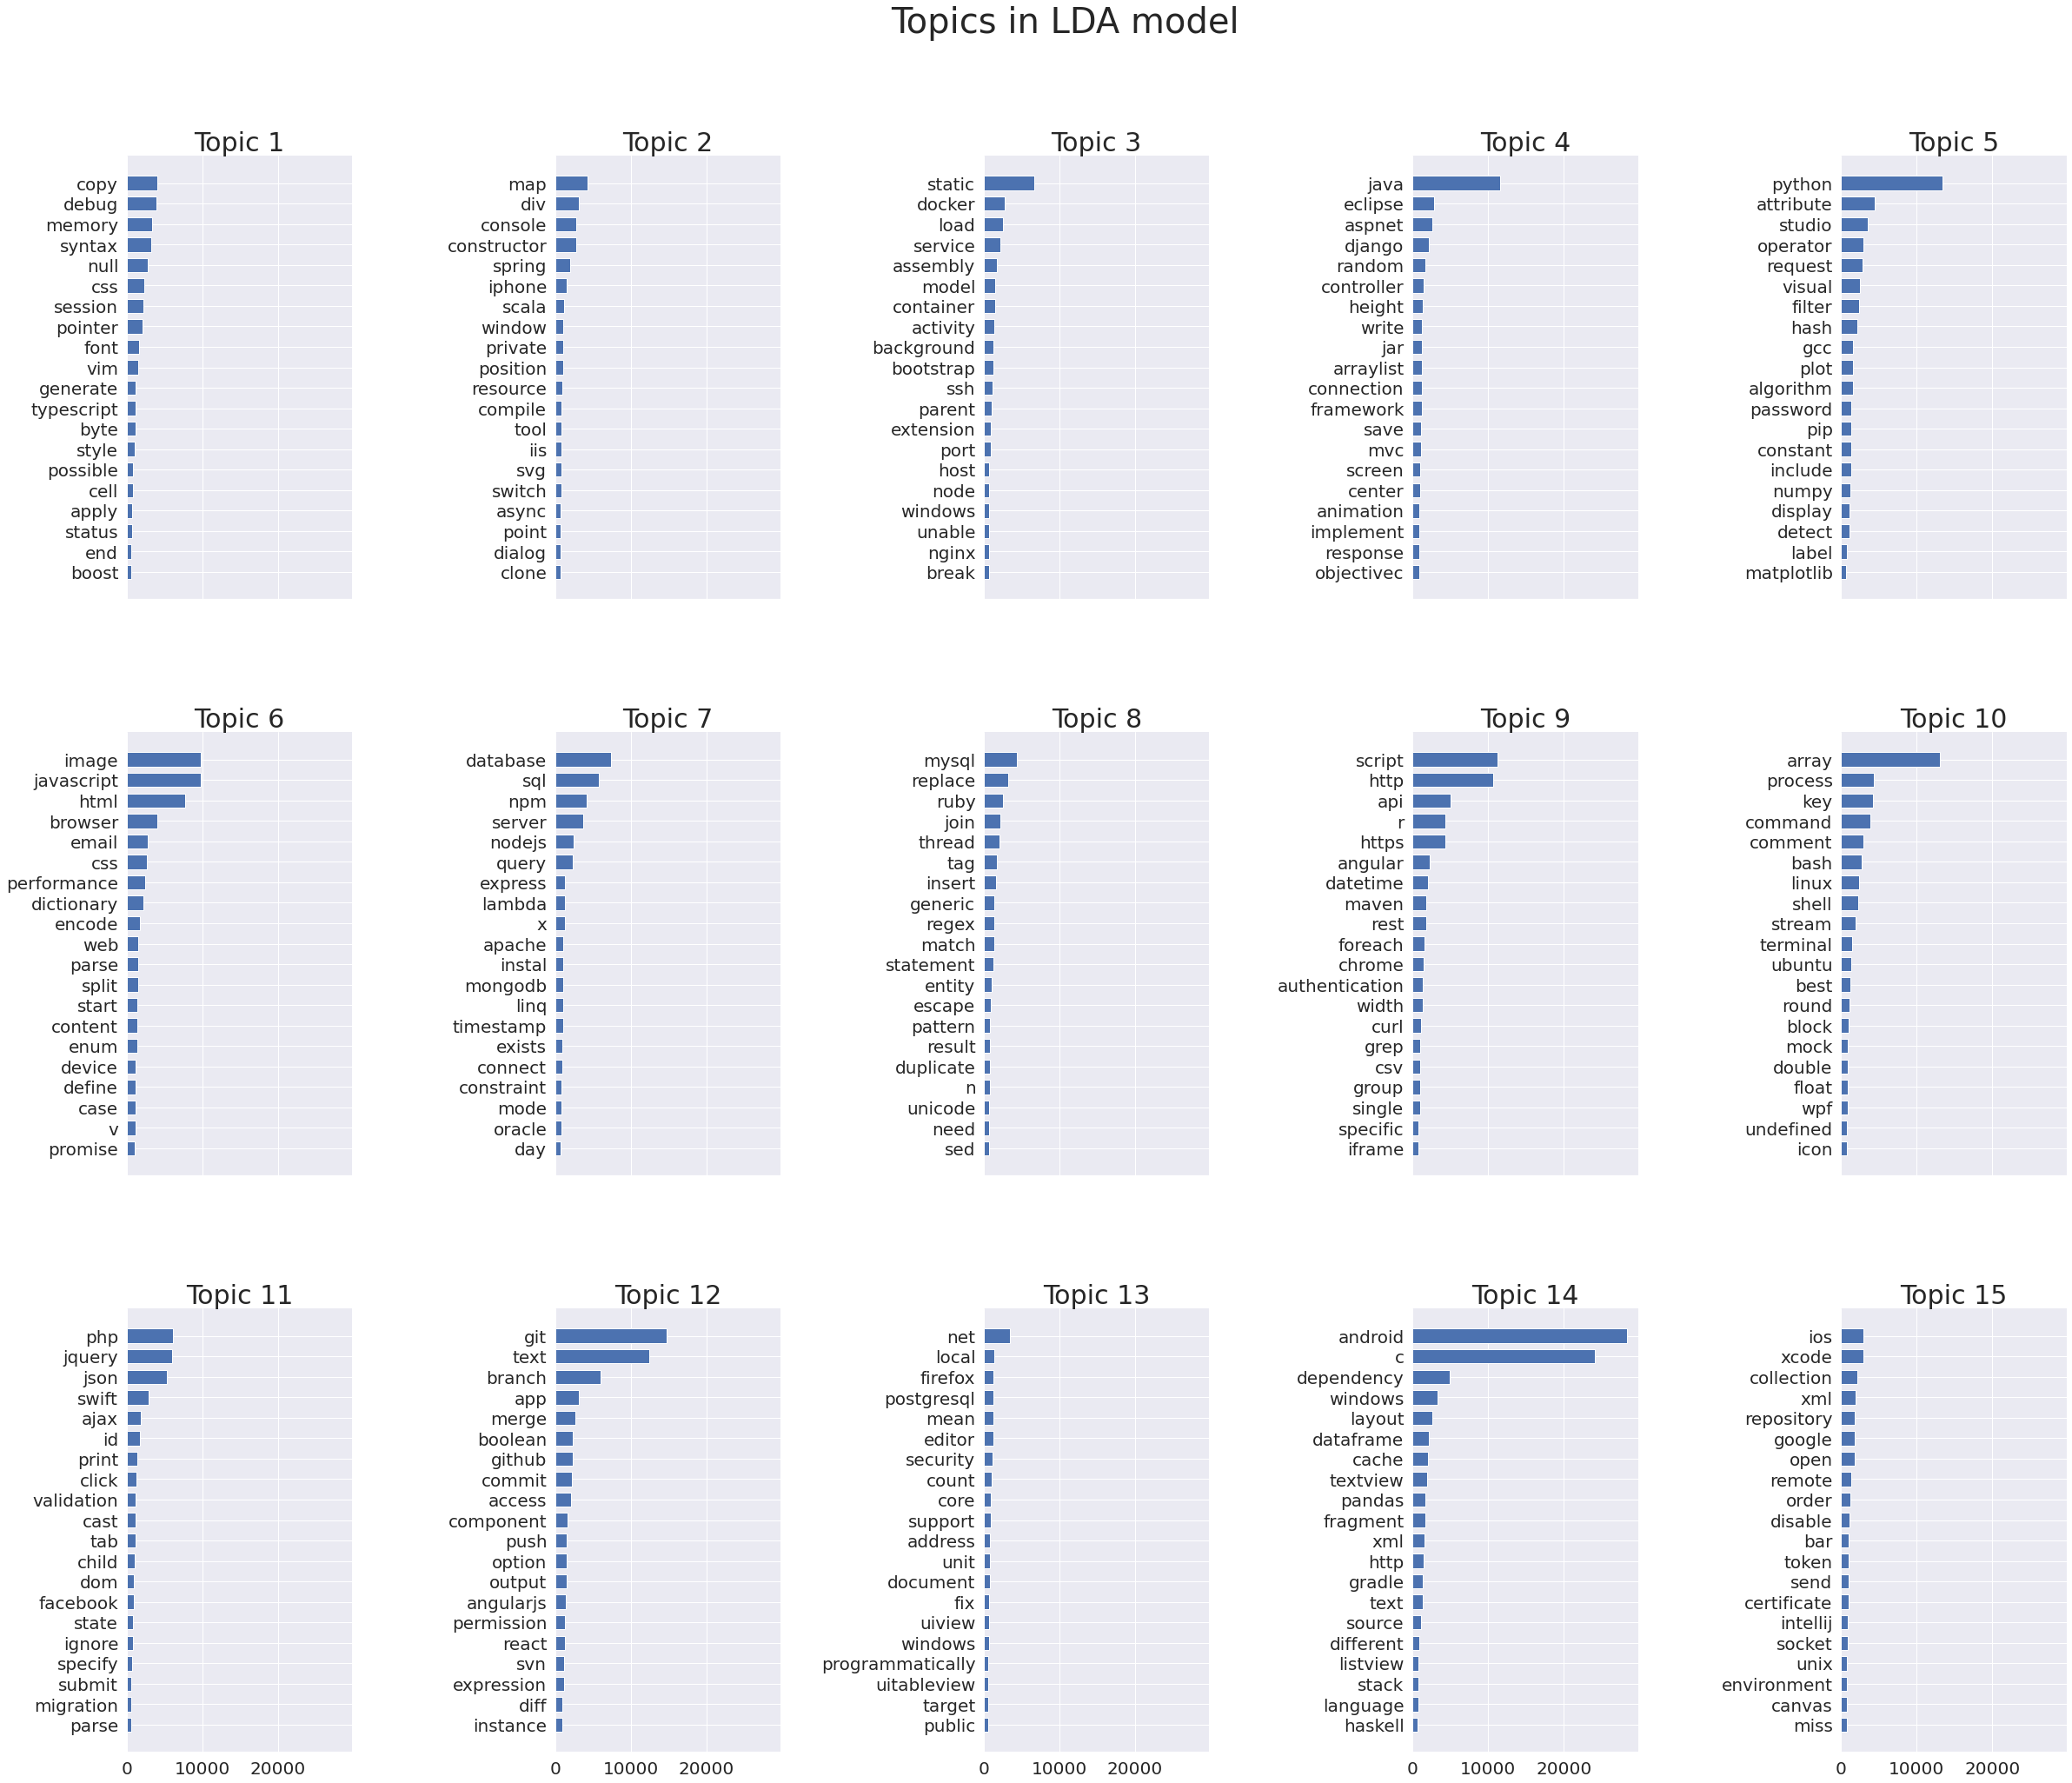

In [ ]:
n_top_words=20

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
len(tf_feature_names)

1864

In [ ]:
print(lda.score(tf))
print(lda.perplexity(tf))
print(metric_coherence_gensim(measure='c_v', 
                      top_n=30, 
                      topic_word_distrib=lda.components_, 
                      dtm=tf, 
                      vocab=np.array(tf_feature_names), 
                      texts=all_data.apply(lambda x : word_tokenize(x)),
                      return_mean=True))

-5645699.39510663
318.5133255480597
0.34938025518847216


## LDA pipeline

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(40, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

In [ ]:
all_data = body_title_filter

In [ ]:
n_top_words=20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=.15, min_df=20,
                                max_features=10000,
                                token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                stop_words='english'
                                )
t0 = time()
tf = tf_vectorizer.fit_transform(all_data)
print("done in %0.3fs." % (time() - t0))
print()

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (100000, 7000))
lda = LatentDirichletAllocation(n_components=15, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                doc_topic_prior=0.1,
                                topic_word_prior=0.1)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
done in 1.084s.



 Fitting LDA models with tf features, n_samples=100000 and n_features=7000...
done in 47.023s.


In [ ]:
pickle.dump(tf_vectorizer, open('/tf_vectorizer.pkl', 'wb'))
pickle.dump(tf, open('/tf.pkl', 'wb'))
pickle.dump(lda, open('/lda.pkl', 'wb'))

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
# n_top_words=20

# tf_feature_names = tf_vectorizer.get_feature_names()
# plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
# print(lda.score(tf))
# print(lda.perplexity(tf))
# print(metric_coherence_gensim(measure='c_v', 
#                       top_n=30, 
#                       topic_word_distrib=lda.components_, 
#                       dtm=tf, 
#                       vocab=np.array(tf_feature_names), 
#                       texts=all_data.apply(lambda x : word_tokenize(x)),
#                       return_mean=True))

In [ ]:
tf_single = tf_vectorizer.transform([all_data[20]])

In [ ]:
lda_output = lda.transform(tf_single)

In [ ]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(tf_single.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14
Doc0,0.010000,0.010000,0.010000,0.010000,0.010000,0.250000,0.010000,0.600000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000


In [ ]:
lda.components_.shape

(15, 1864)

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=tf, lda_model=lda, n_words=20):
    keywords = np.array(tf_vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf, lda_model=lda, n_words=700)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Word 30,Word 31,Word 32,Word 33,Word 34,Word 35,Word 36,Word 37,Word 38,Word 39,...,Word 660,Word 661,Word 662,Word 663,Word 664,Word 665,Word 666,Word 667,Word 668,Word 669,Word 670,Word 671,Word 672,Word 673,Word 674,Word 675,Word 676,Word 677,Word 678,Word 679,Word 680,Word 681,Word 682,Word 683,Word 684,Word 685,Word 686,Word 687,Word 688,Word 689,Word 690,Word 691,Word 692,Word 693,Word 694,Word 695,Word 696,Word 697,Word 698,Word 699
Topic 0,copy,debug,memory,syntax,null,css,session,pointer,font,vim,generate,typescript,byte,style,possible,cell,apply,status,end,boost,compilation,wait,member,profile,jvm,deployment,append,equal,callback,structure,j,ipython,maximum,hover,literal,twitter,bind,letter,dockercompose,reverse,...,django,javautildate,atom,mercurial,expose,execute,csv,redis,assembly,xmlhttprequest,certain,easy,include,popover,block,swift,plugin,information,expand,inheritance,appear,plus,unavailable,apk,spark,currently,z,plugins,fit,rsync,actually,visible,parenthesis,definition,hex,activerecord,period,garbage,single,jupyter
Topic 1,map,div,console,constructor,spring,iphone,scala,window,private,position,resource,compile,tool,iis,svg,switch,async,point,dialog,clone,modal,invalid,hibernate,hashmap,example,junit,main,video,equivalent,border,nest,initialization,initialize,jpa,keyword,play,resize,bean,good,handler,...,validation,runnable,blur,valid,leak,approach,operating,extra,wcf,freeze,firebug,nuget,pycharm,jaxrs,click,imagemagick,array,compiler,jersey,deal,optional,linear,native,fails,socket,onchange,cut,classpath,calculate,final,location,write,sed,resolve,datatables,initial,broadcast,override,builtin,transfer
Topic 2,static,docker,load,service,assembly,model,container,activity,background,bootstrap,ssh,parent,extension,port,host,node,windows,unable,nginx,break,range,true,architecture,jenkins,webpack,second,contains,optimization,false,nuget,feature,compiler,inheritance,stash,hidden,timeout,know,box,fetch,launch,...,invalid,verify,batch,jqueryui,margin,declare,el,logical,hyperlink,adapter,debugger,say,language,app,include,interactive,setting,rust,private,grant,ping,pdf,overhead,jsx,block,stdin,display,scrollable,webkit,instal,purpose,cycle,bluetooth,strategy,enable,main,aws,jquery,alias,public
Topic 3,java,eclipse,aspnet,django,random,controller,height,write,jar,arraylist,connection,framework,save,mvc,screen,center,animation,implement,response,objectivec,render,keyboard,close,ide,plugin,kotlin,body,abstract,limit,firebase,emacs,menu,final,sign,calculate,rule,automatically,void,buffer,overflow,...,functionality,plugins,specify,flex,instanceof,modal,define,app,shell,keystore,artifact,serialize,support,behavior,divs,open,cancel,promise,react,stretch,servlet,analysis,short,display,language,declaration,useful,expect,val,pointer,distribution,programmatically,flush,obsolete,public,assign,real,raise,private,practical
Topic 4,python,attribute,studio,operator,request,visual,filter,hash,gcc,plot,algorithm,password,pip,constant,include,numpy,display,detect,label,matplotlib,windows,gitignore,binary,reset,conflict,procedure,printing,tensorflow,align,self,tuples,outside,declaration,overload,grid,legend,zip,gdb,flexbox,cause,...,resolve,control,unique,strip,mode,lodash,dataframes,java,free,redux,subdirectory,say,cross,edit,quick,resharper,recursive,feature,single,necessary,vuejs,print,follow,theme,download,correct,php,aspect,stack,generate,progress,svg,blank,swing,pull,support,draw,separate,overflow,arrow
Topic 5,image,javascript,html,browser,email,css,performance,dictionary,encode,web,parse,split,start,content,enum,device,define,case,v,promise,pas,download,comparison,execute,client,location,compare,throw,override,dll,binding,large,hide,checkbox,io,asynchronous,intent,flutter,notebook,contain,...,control,relat

In [ ]:
n_largest = 15-(df_document_topic.iloc[0,:]>.15).value_counts()[0]
arg = list(df_document_topic.iloc[0,:].argsort()[:-n_largest-1:-1].values)
arg

[7, 5]

In [ ]:
tag=[]
for e in arg:
  for w in df_topic_keywords.iloc[e,:50]:
      if w in body_title_token_filter[20]:
        tag.append(w)
if len(tag)>5:
  tag = tag[:5]
else:
  tag

In [ ]:
tag

['tag', 'generic', 'escape', 'html']

## Doc-Topic matrix

In [ ]:
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(tf.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.810000,0.020000,0.040000,0.000000,0.020000,0.020000,0.060000,0.000000,0.000000,0.000000,0.000000,4
Doc1,0.550000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.280000,0.010000,0.010000,0.010000,0.010000,0
Doc2,0.030000,0.600000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,1
Doc3,0.020000,0.020000,0.170000,0.020000,0.320000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.320000,0.020000,0.020000,4
Doc4,0.010000,0.010000,0.110000,0.010000,0.010000,0.010000,0.830000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,6
Doc5,0.010000,0.010000,0.120000,0.010000,0.120000,0.010000,0.010000,0.010000,0.010000,0.010000,0.120000,0.010000,0.010000,0.010000,0.540000,14
Doc6,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.170000,0.020000,0.630000,0.020000,0.020000,12
Doc7,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.200000,0.020000,0.020000,0.020000,0.020000,0.560000,0.020000,13
Doc8,0.590000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.280000,0.010000,0
Doc9,0.010000,0.010000,0.010000,0.010000,0.880000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.060000,0.010000,4


In [ ]:
# df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
# df_topic_distribution.columns = ['Topic Num', 'Num Documents']
# df_topic_distribution

## Topic-keywords

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=tf, lda_model=lda, n_words=20):
    keywords = np.array(tf_vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords_lda = show_topics(vectorizer=tf, lda_model=lda, n_words=700)        

# Topic - Keywords Dataframe
df_topic_keywords_lda = pd.DataFrame(topic_keywords_lda)
df_topic_keywords_lda.columns = ['Word '+str(i) for i in range(df_topic_keywords_lda.shape[1])]
df_topic_keywords_lda.index = ['Topic '+str(i) for i in range(df_topic_keywords_lda.shape[0])]
df_topic_keywords_lda

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Word 30,Word 31,Word 32,Word 33,Word 34,Word 35,Word 36,Word 37,Word 38,Word 39,...,Word 660,Word 661,Word 662,Word 663,Word 664,Word 665,Word 666,Word 667,Word 668,Word 669,Word 670,Word 671,Word 672,Word 673,Word 674,Word 675,Word 676,Word 677,Word 678,Word 679,Word 680,Word 681,Word 682,Word 683,Word 684,Word 685,Word 686,Word 687,Word 688,Word 689,Word 690,Word 691,Word 692,Word 693,Word 694,Word 695,Word 696,Word 697,Word 698,Word 699
Topic 0,copy,debug,memory,syntax,null,css,session,pointer,font,vim,generate,typescript,byte,style,possible,cell,apply,status,end,boost,compilation,wait,member,profile,jvm,deployment,append,equal,callback,structure,j,ipython,maximum,hover,literal,twitter,bind,letter,dockercompose,reverse,...,django,javautildate,atom,mercurial,expose,execute,csv,redis,assembly,xmlhttprequest,certain,easy,include,popover,block,swift,plugin,information,expand,inheritance,appear,plus,unavailable,apk,spark,currently,z,plugins,fit,rsync,actually,visible,parenthesis,definition,hex,activerecord,period,garbage,single,jupyter
Topic 1,map,div,console,constructor,spring,iphone,scala,window,private,position,resource,compile,tool,iis,svg,switch,async,point,dialog,clone,modal,invalid,hibernate,hashmap,example,junit,main,video,equivalent,border,nest,initialization,initialize,jpa,keyword,play,resize,bean,good,handler,...,validation,runnable,blur,valid,leak,approach,operating,extra,wcf,freeze,firebug,nuget,pycharm,jaxrs,click,imagemagick,array,compiler,jersey,deal,optional,linear,native,fails,socket,onchange,cut,classpath,calculate,final,location,write,sed,resolve,datatables,initial,broadcast,override,builtin,transfer
Topic 2,static,docker,load,service,assembly,model,container,activity,background,bootstrap,ssh,parent,extension,port,host,node,windows,unable,nginx,break,range,true,architecture,jenkins,webpack,second,contains,optimization,false,nuget,feature,compiler,inheritance,stash,hidden,timeout,know,box,fetch,launch,...,invalid,verify,batch,jqueryui,margin,declare,el,logical,hyperlink,adapter,debugger,say,language,app,include,interactive,setting,rust,private,grant,ping,pdf,overhead,jsx,block,stdin,display,scrollable,webkit,instal,purpose,cycle,bluetooth,strategy,enable,main,aws,jquery,alias,public
Topic 3,java,eclipse,aspnet,django,random,controller,height,write,jar,arraylist,connection,framework,save,mvc,screen,center,animation,implement,response,objectivec,render,keyboard,close,ide,plugin,kotlin,body,abstract,limit,firebase,emacs,menu,final,sign,calculate,rule,automatically,void,buffer,overflow,...,functionality,plugins,specify,flex,instanceof,modal,define,app,shell,keystore,artifact,serialize,support,behavior,divs,open,cancel,promise,react,stretch,servlet,analysis,short,display,language,declaration,useful,expect,val,pointer,distribution,programmatically,flush,obsolete,public,assign,real,raise,private,practical
Topic 4,python,attribute,studio,operator,request,visual,filter,hash,gcc,plot,algorithm,password,pip,constant,include,numpy,display,detect,label,matplotlib,windows,gitignore,binary,reset,conflict,procedure,printing,tensorflow,align,self,tuples,outside,declaration,overload,grid,legend,zip,gdb,flexbox,cause,...,resolve,control,unique,strip,mode,lodash,dataframes,java,free,redux,subdirectory,say,cross,edit,quick,resharper,recursive,feature,single,necessary,vuejs,print,follow,theme,download,correct,php,aspect,stack,generate,progress,svg,blank,swing,pull,support,draw,separate,overflow,arrow
Topic 5,image,javascript,html,browser,email,css,performance,dictionary,encode,web,parse,split,start,content,enum,device,define,case,v,promise,pas,download,comparison,execute,client,location,compare,throw,override,dll,binding,large,hide,checkbox,io,asynchronous,intent,flutter,notebook,contain,...,control,relat

In [ ]:
# pickle.dump(df_topic_keywords_lda, open('/content/drive/My Drive/OpenClassrooms/PStackOverfow_fatmi_amine/df_topic_keywords_lda.pkl', 'wb'))

## Evaluation

In [ ]:
df_document_topic=df_document_topic.iloc[:,:-1]

In [ ]:
df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
Doc0,0.00,0.00,0.00,0.00,0.81,0.02,0.04,0.00,0.02,0.02,0.06,0.00,0.00,0.00,0.00,4
Doc1,0.55,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.28,0.01,0.01,0.01,0.01,0
Doc2,0.03,0.60,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,1
Doc3,0.02,0.02,0.17,0.02,0.32,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.32,0.02,0.02,4
Doc4,0.01,0.01,0.11,0.01,0.01,0.01,0.83,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,6
Doc5,0.01,0.01,0.12,0.01,0.12,0.01,0.01,0.01,0.01,0.01,0.12,0.01,0.01,0.01,0.54,14
Doc6,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.17,0.02,0.63,0.02,0.02,12
Doc7,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.20,0.02,0.02,0.02,0.02,0.56,0.02,13
Doc8,0.59,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.28,0.01,0
Doc9,0.01,0.01,0.01,0.01,0.88,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.01,4


In [ ]:
df_pos=[]
for i in range(len(df_document_topic)):

  n_largest = 15-(df_document_topic.iloc[i,:]>.15).value_counts()[0]
  arg = list(df_document_topic.iloc[i,:].argsort()[:-n_largest-1:-1].values)

  df_pos.append(arg)

In [ ]:
df_pos[:10]

[[4], [0, 10], [1], [12, 4, 2], [6], [14], [12, 10], [13, 8], [0, 13], [4]]

In [ ]:
tag_list=[]
for i,l in enumerate(df_pos):
  tag=[]
  for e in l:
    for w in df_topic_keywords.iloc[e,:50]:
       if w in body_title_token_filter[i]:
         tag.append(w)
  if len(tag)>5:
    tag_list.append(tag[:5])
  else:
    tag_list.append(tag)

In [ ]:
for w in df_topic_keywords.iloc[9,:]:
       if w in body_title_token_filter[8]:
         print(w)

c
memory


In [ ]:
pd.Series(tag_list).apply(lambda x: len(x)).value_counts()

2    30842
3    24609
1    19085
4    12625
5     8608
0     4659
dtype: int64

In [ ]:
pd.Series(tag_list)[:25]

0     [hash, algorithm, password, constant]
1                               [null, php]
2                       [spring, hibernate]
3              [support, outside, assembly]
4             [database, sql, server, linq]
5                         [collection, xml]
6           [firefox, security, validation]
7                                    [curl]
8                               [memory, c]
9           [plot, label, matplotlib, grid]
10                                      [r]
11    [net, core, support, windows, target]
12        [studio, visual, display, branch]
13                 [device, mobile, server]
14         [svn, commandline, bad, eclipse]
15                                  [start]
16             [split, execute, large, sql]
17    [image, javascript, html, email, css]
18        [validation, activerecord, rspec]
19                [emacs, windows, windows]
20             [tag, generic, escape, html]
21              [database, design, comment]
22                    [text, sql

In [ ]:
df_compare_tags = pd.concat([pd.Series(tag_list),tags_cleaned], axis=1)

In [ ]:
df_compare_tags[1100:1155]

,0,Tags_cleaned
1100,"[process, linux]","[linux, winapi, visualc, unix, timer]"
1101,"[java, access, php]","[java, php, oop, theory]"
1102,"[database, sql, server, datetime, csv]","[mysql, sqlserver, csv, bcp]"
1103,"[javascript, track]","[php, apache, log, download, analytics]"
1104,"[windows, svn, web]","[net, aspnet, svn, versioning]"
1105,"[net, security, document, html, browser]","[c, html, webservices, printing]"
1106,"[sql, server, mysql, replace]","[mysql, sqlserver]"
1107,"[script, database, assembly]","[c, net, script, compilerconstruction]"
1108,"[java, sign, unsigned]","[languageagnostic, type]"
1109,"[mode, iphone]","[objectivec, landscape, ios]"


In [ ]:
df_compare_tags['Tags_predict']=df_compare_tags[0].apply(lambda x: list(set(x)))

In [ ]:
df_compare_tags[:15]

,0,Tags_cleaned,Tags_predict
0,"[hash, algorithm, password, constant]","[php, security, hash, password, blowfish]","[constant, hash, algorithm, password]"
1,"[null, php]","[php, null]","[php, null]"
2,"[spring, hibernate]","[java, spring, hibernate]","[hibernate, spring]"
3,"[support, outside, assembly]","[compilerconstruction, bootstrapping]","[assembly, outside, support]"
4,"[database, sql, server, linq]","[sqlserver, deadlock]","[server, database, sql, linq]"
5,"[collection, xml]","[c, xml, inheritance, serialization, xmlserial...","[collection, xml]"
6,"[firefox, security, validation]","[firefox, ssl]","[security, firefox, validation]"
7,[curl],"[iphone, uipageviewcontroller, ios]",[curl]
8,"[memory, c]","[c, memory]","[c, memory]"
9,"[plot, label, matplotlib, grid]","[python, matplotlib, plot, grid, label]","[matplotlib, label, grid, plot]"


In [ ]:
tags_c=[]
for list1 in df_compare_tags['Tags_cleaned']:
  for e in list1:
    tags_c.append(e)

In [ ]:
len(tags_c), len(set(tags_c))

(288092, 12677)

In [ ]:
tags_p=[]
for list1 in df_compare_tags['Tags_predict']:
  for e in list1:
    tags_p.append(e)

In [ ]:
len(tags_p), len(set(tags_p))

(246137, 735)

In [ ]:
len(set(tags_c + tags_p))

12849

In [ ]:
all_tags=list(set(tags_c+tags_p))

In [ ]:
len(all_tags)

12849

In [ ]:
all_tags_dict={}
for i,t in enumerate(all_tags):
  all_tags_dict[t]=i


In [ ]:
df_compare_tags['Tags_cleaned_Jaccard'] = df_compare_tags['Tags_cleaned'].apply(lambda x: [all_tags_dict[e] for e in x])
df_compare_tags['Tags_predict_Jaccard'] = df_compare_tags['Tags_predict'].apply(lambda x: [all_tags_dict[e] for e in x])

In [ ]:
df_compare_tags

,0,Tags_cleaned,Tags_predict,Tags_cleaned_Jaccard,Tags_predict_Jaccard
0,"[hash, algorithm, password, constant]","[php, security, hash, password, blowfish]","[constant, hash, algorithm, password]","[12321, 4095, 1814, 11768, 8255]","[8067, 1814, 3948, 11768]"
1,"[null, php]","[php, null]","[php, null]","[12321, 4335]","[12321, 4335]"
2,"[spring, hibernate]","[java, spring, hibernate]","[hibernate, spring]","[8652, 12732, 1453]","[1453, 12732]"
3,"[support, outside, assembly]","[compilerconstruction, bootstrapping]","[assembly, outside, support]","[7321, 9833]","[1529, 8901, 4]"
4,"[database, sql, server, linq]","[sqlserver, deadlock]","[server, database, sql, linq]","[8537, 2268]","[2943, 3652, 11404, 2866]"
...,...,...,...,...,...
100423,"[script, http, https]","[javascript, jquery, dom, attr, prop]","[http, script, https]","[1803, 6555, 12483, 3871, 1005]","[7771, 565, 6049]"
100424,[bash],"[bash, alias]",[bash],"[7273, 11456]",[7273]
100425,"[git, svn, single, reset]",[git],"[svn, reset, single, git]",[1204],"[12433, 5116, 4192, 1204]"
100426,"[docker, container, nginx]","[nginx, docker, reverseproxy, dockernetworking]","[docker, nginx, container]","[9315, 7963, 10177, 225]","[7963, 9315, 11856]"


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score([88,99], [88,99], average='micro')

1.0

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))
list1 = [12321, 4095, 1814, 11768, 8255]	
list2 = [8067, 1814, 3948, 11768]
jaccard_similarity(list1, list2)

0.2857142857142857

In [ ]:
jaccard=[]
for i in range(len(df_compare_tags)):
  list1= df_compare_tags['Tags_cleaned_Jaccard'][i]
  list2= df_compare_tags['Tags_predict_Jaccard'][i]
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts()

0.00    37280
0.25    11407
0.33    11363
0.20     9453
0.50     8867
0.17     6176
0.40     3649
0.14     3208
0.67     2680
1.00     2157
0.12     1243
0.29     1079
0.60      644
0.75      582
0.11      401
0.43      183
0.80       56
dtype: int64

In [ ]:
(pd.Series(jaccard)>.2).value_counts()

False    57761
True     42667
dtype: int64

In [ ]:
pd.Series(jaccard).mean()

0.21198719480627576

# NMF

## N_topic = 15

Extracting tf-idf features for NMF...
done in 1.063s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=100000 and n_features=10000...
done in 11.320s.


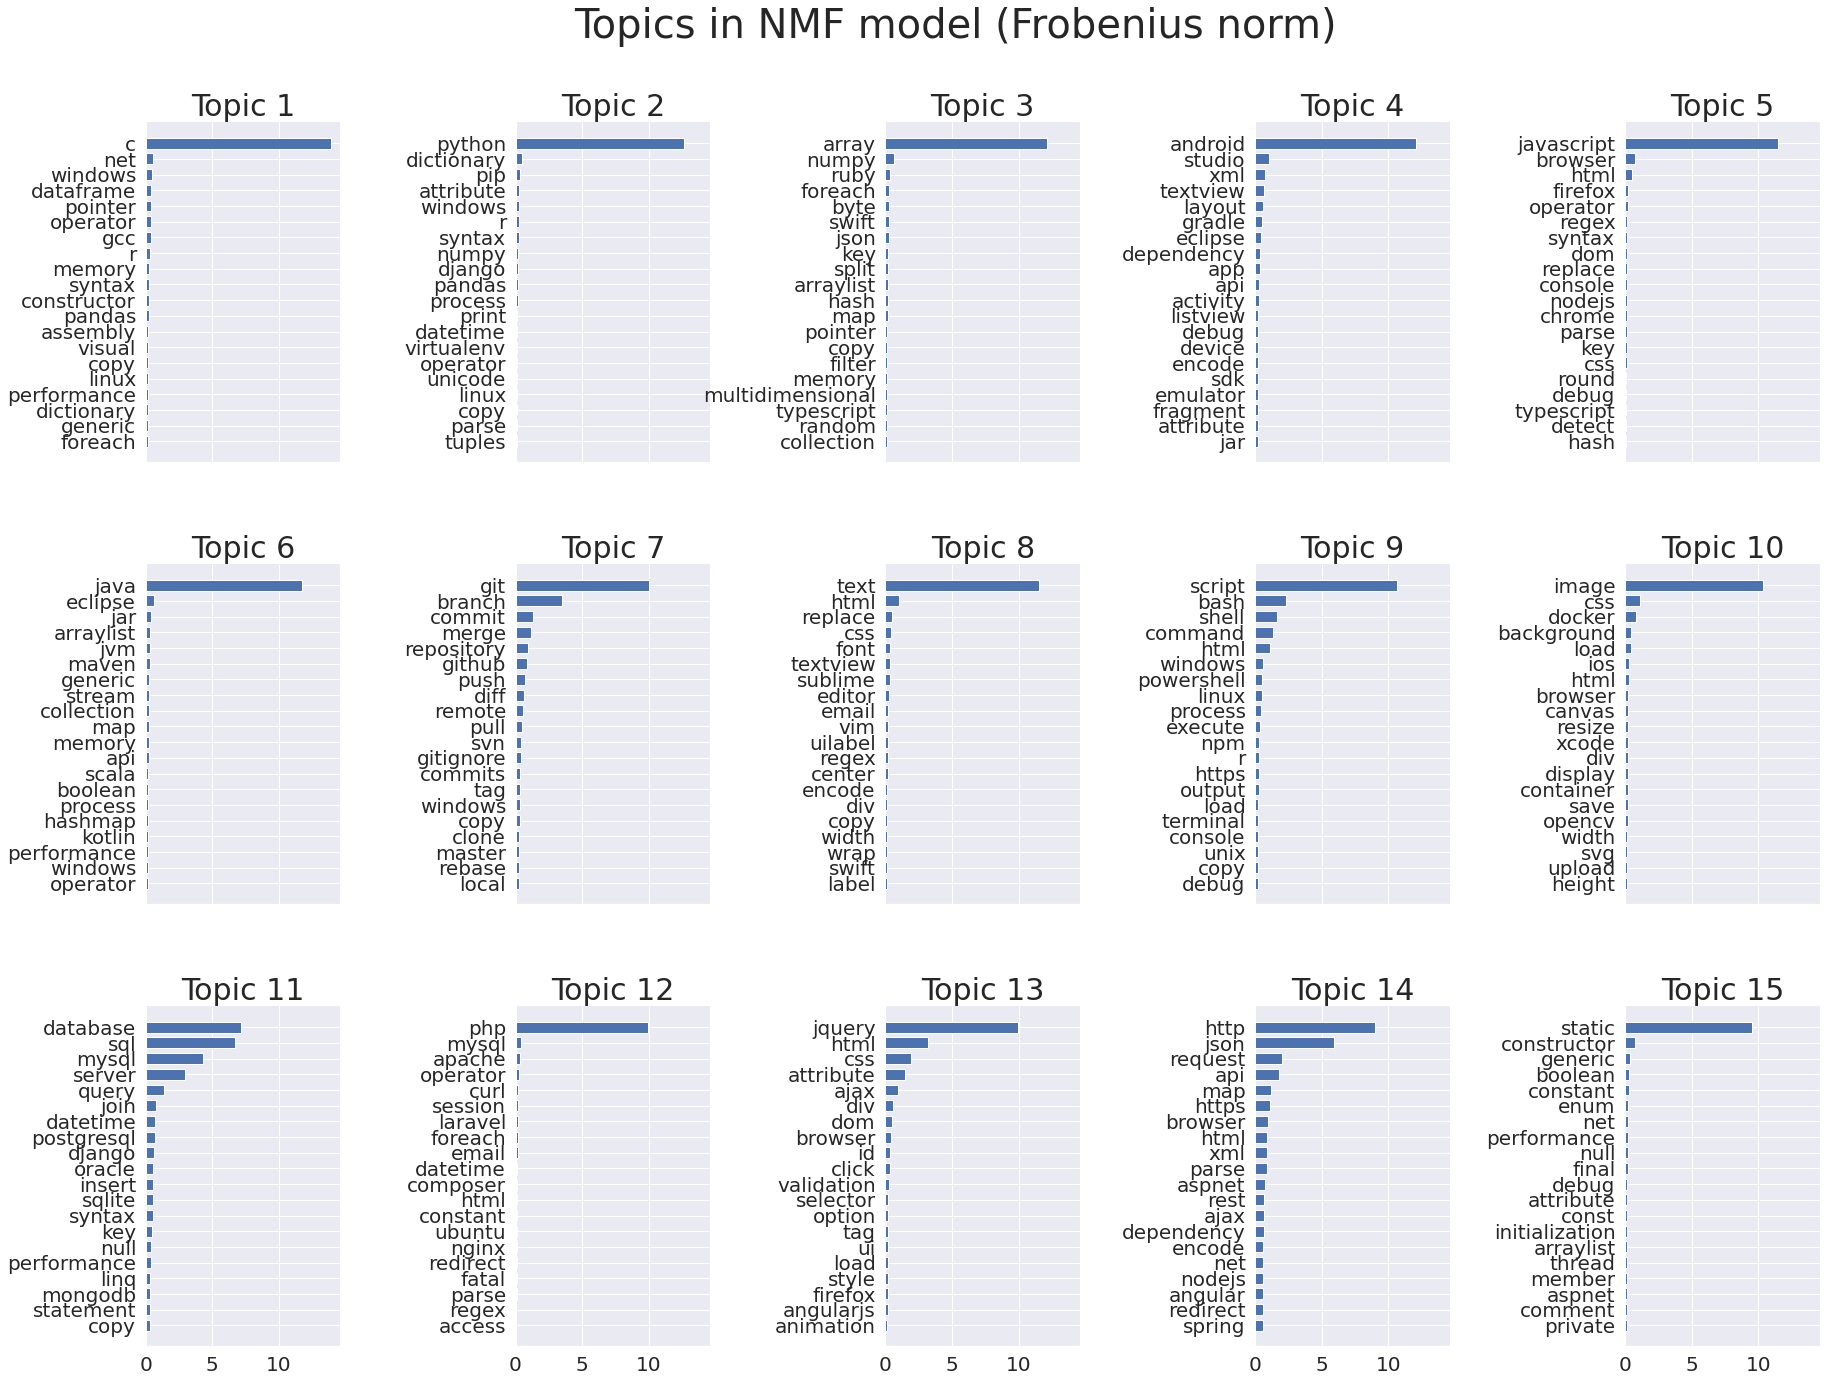



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=100000 and n_features=10000...
done in 9.095s.


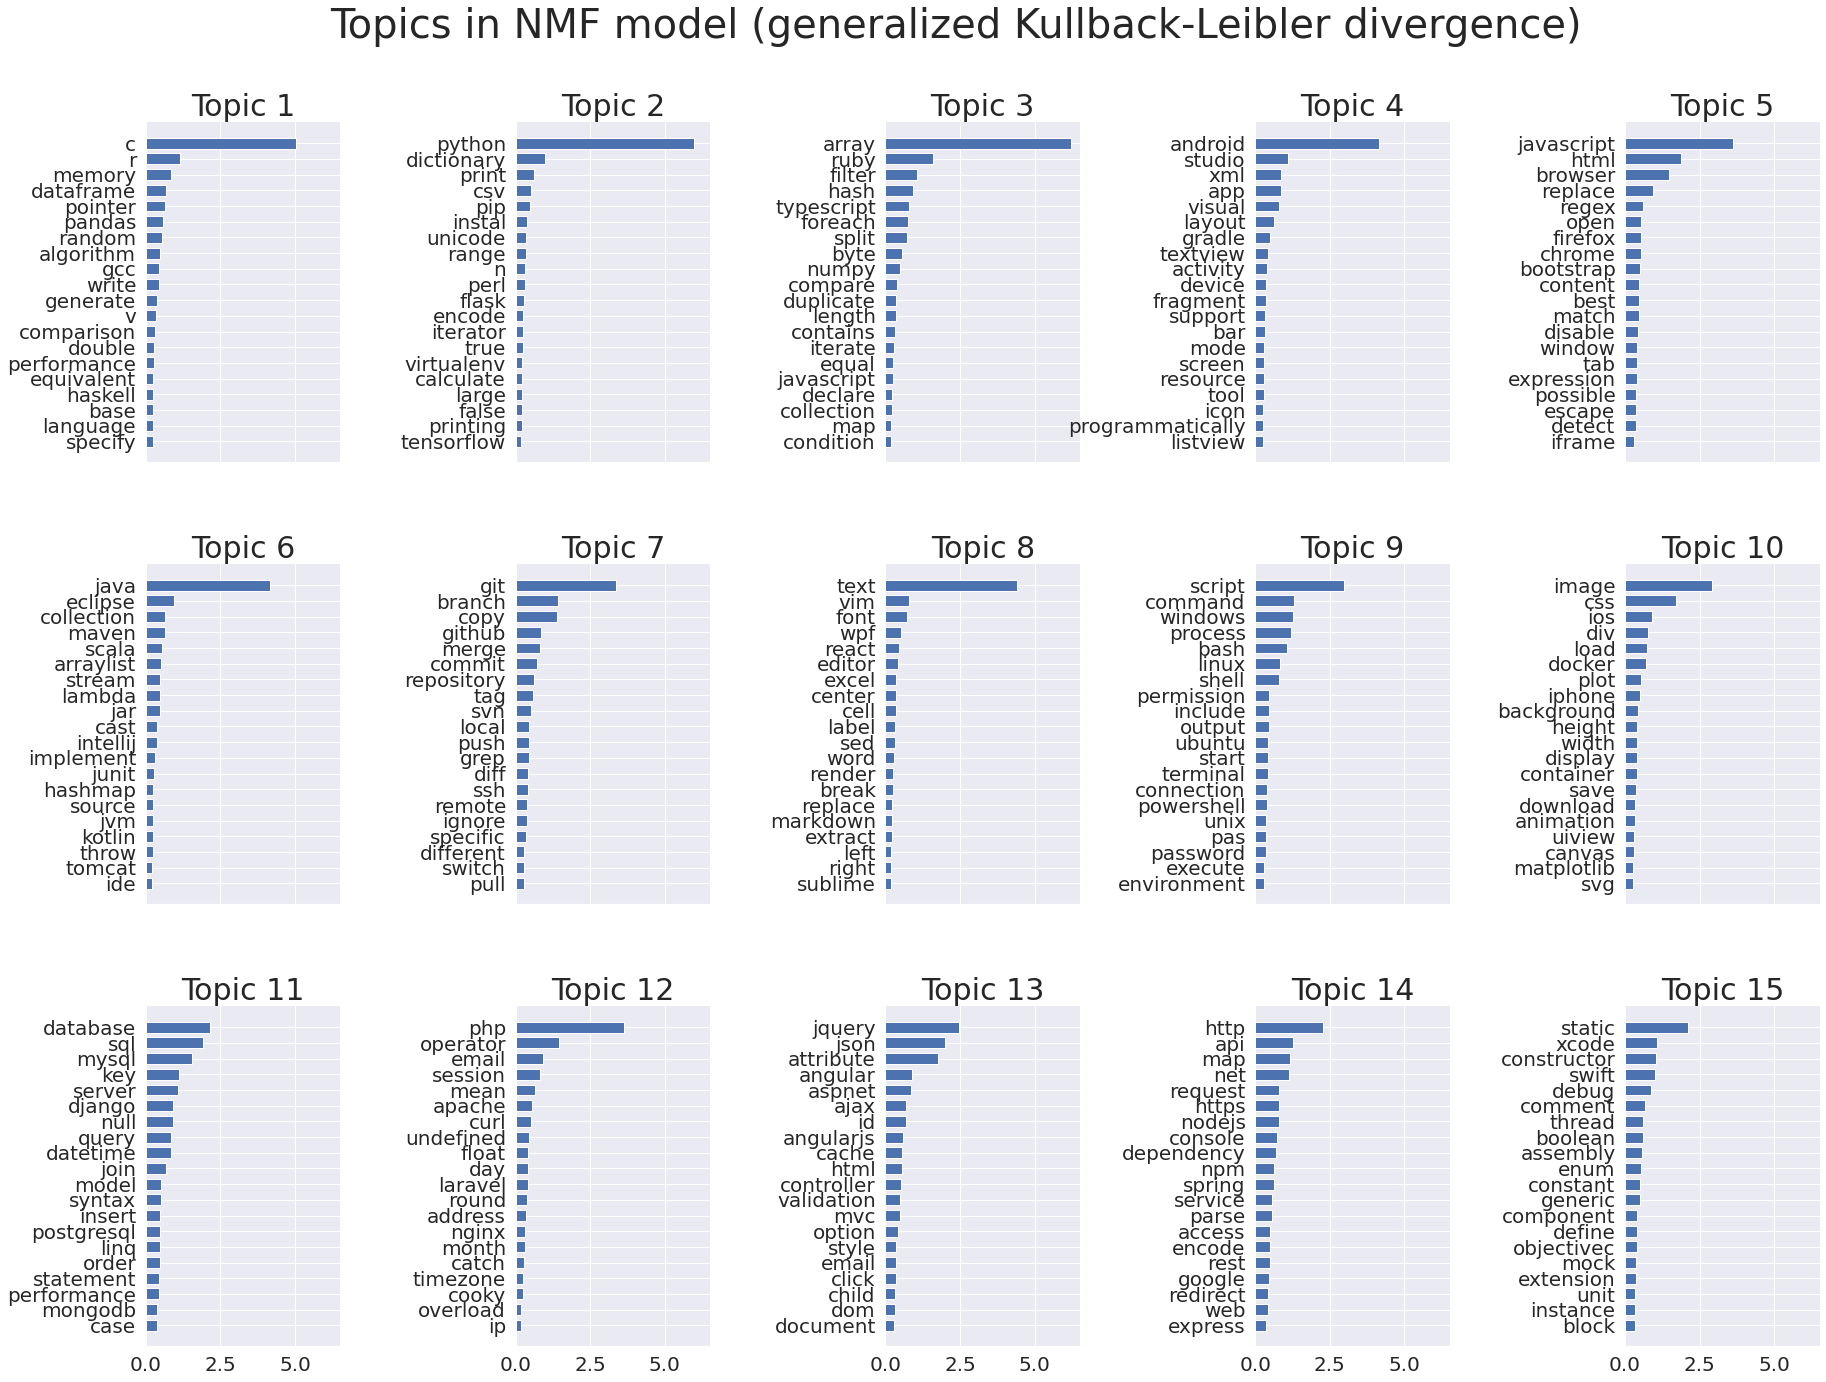

In [ ]:
n_samples = 100000
n_features = 10000
n_components = 15
n_top_words = 20

all_data = body_title_filter

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(30, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.15, min_df=20,
                                   max_features=n_features,
                                   token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(all_data)
print("done in %0.3fs." % (time() - t0))


# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

## N_topic = 20

Extracting tf-idf features for NMF...
done in 1.060s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=100000 and n_features=10000...
done in 19.267s.


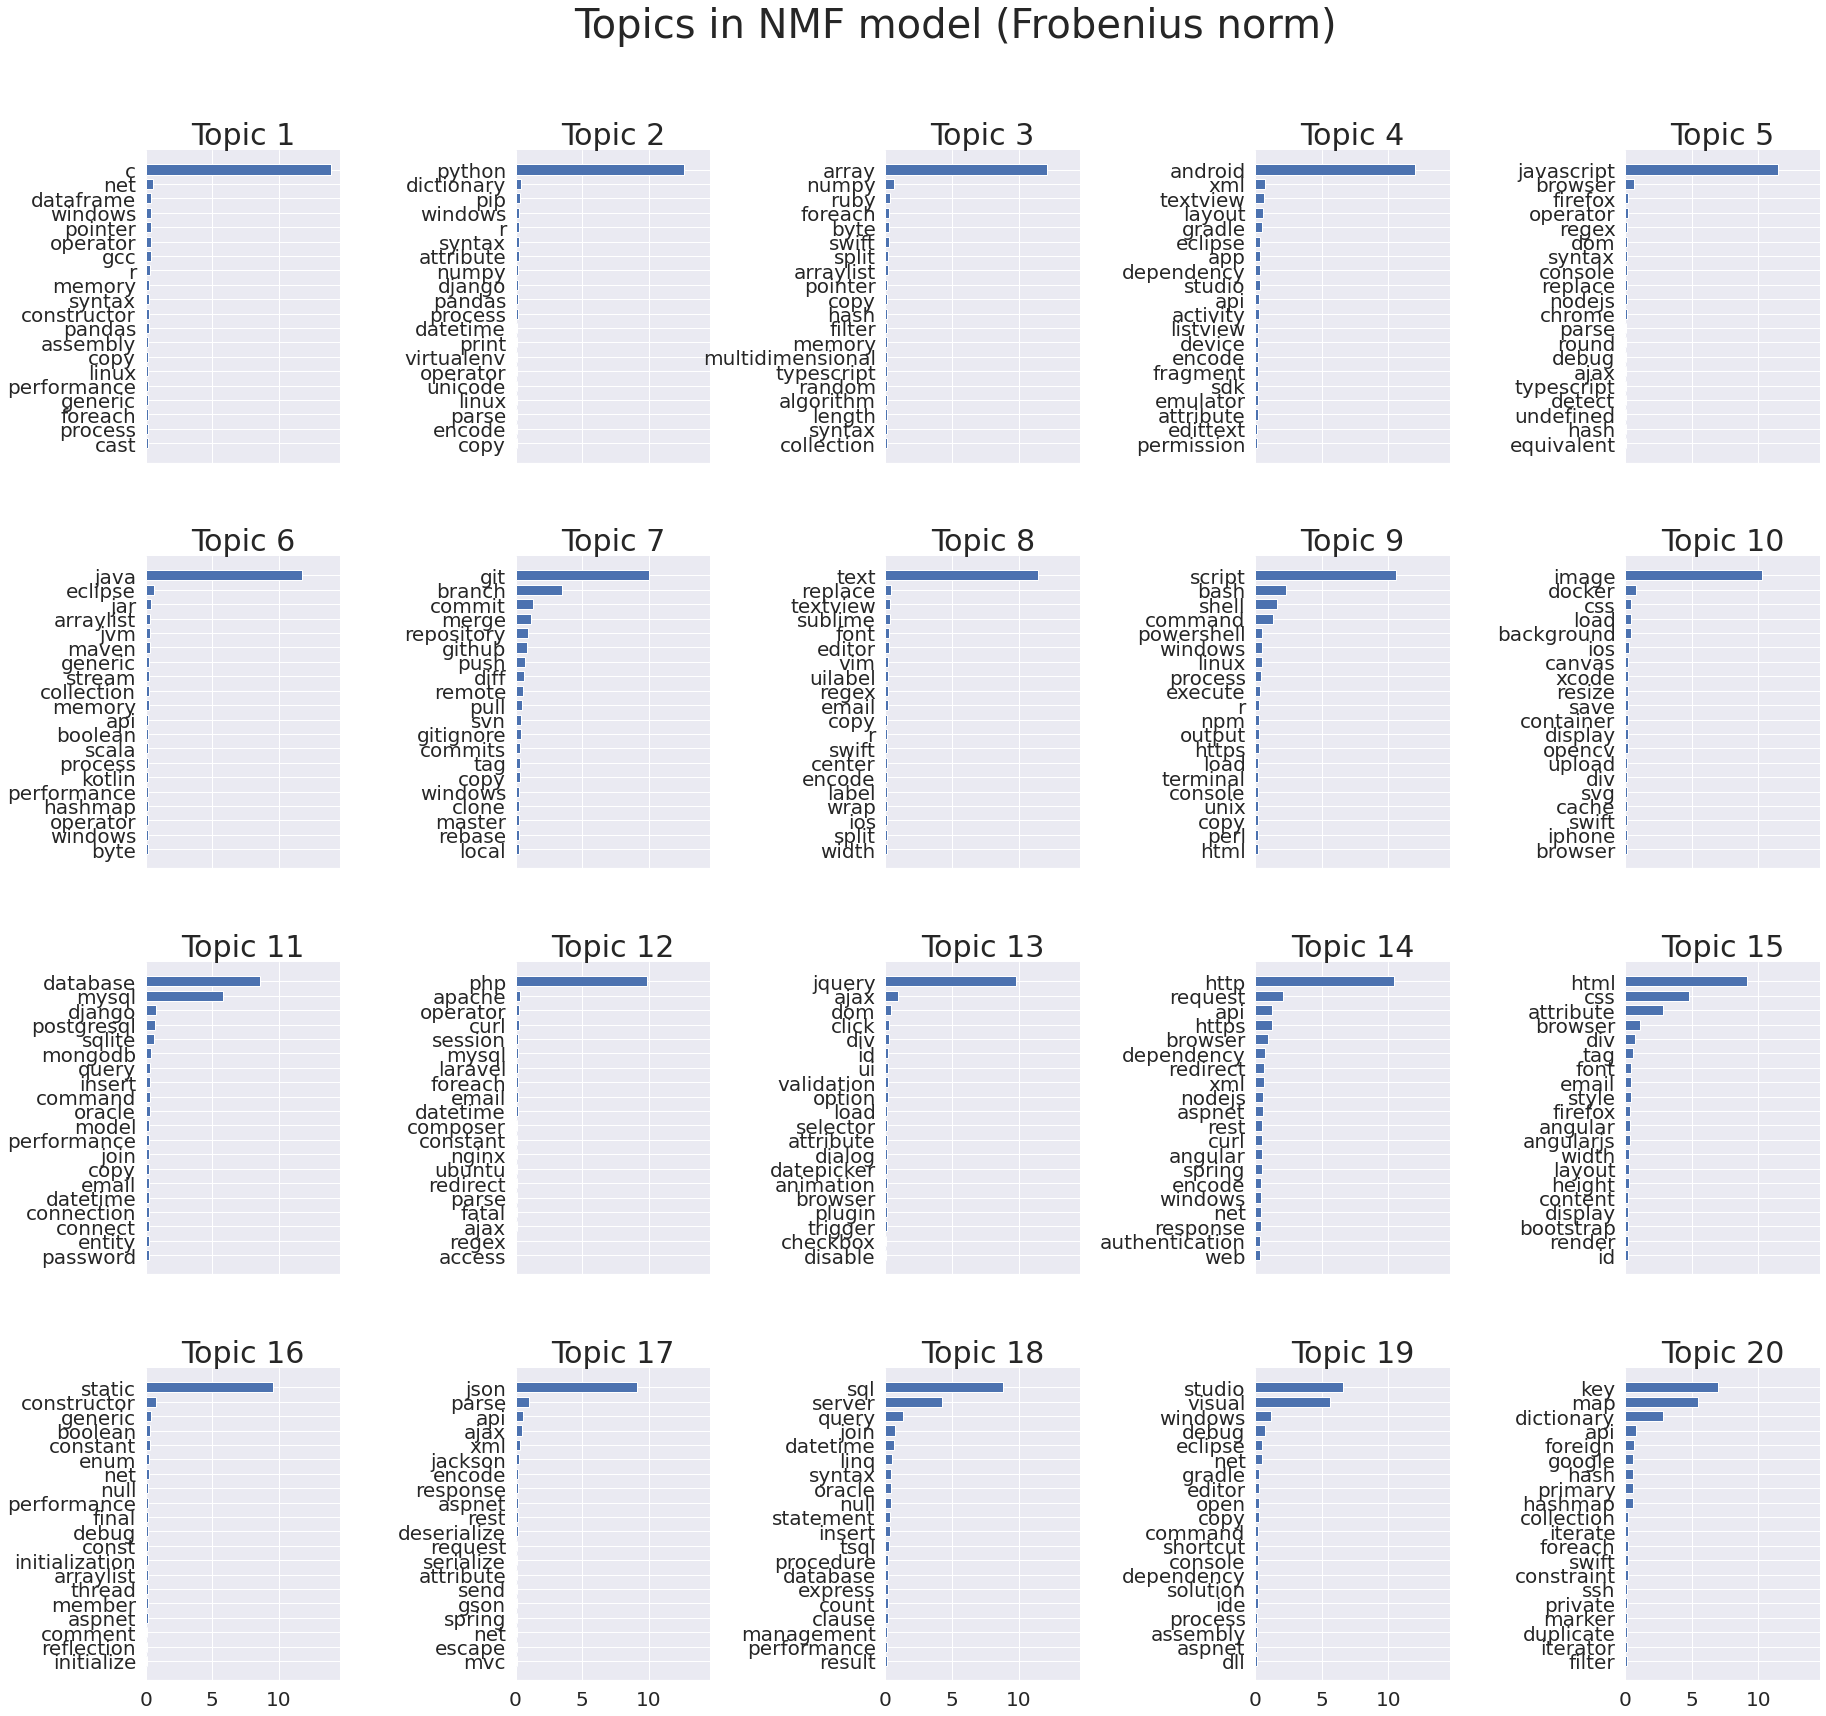



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=100000 and n_features=10000...
done in 12.316s.


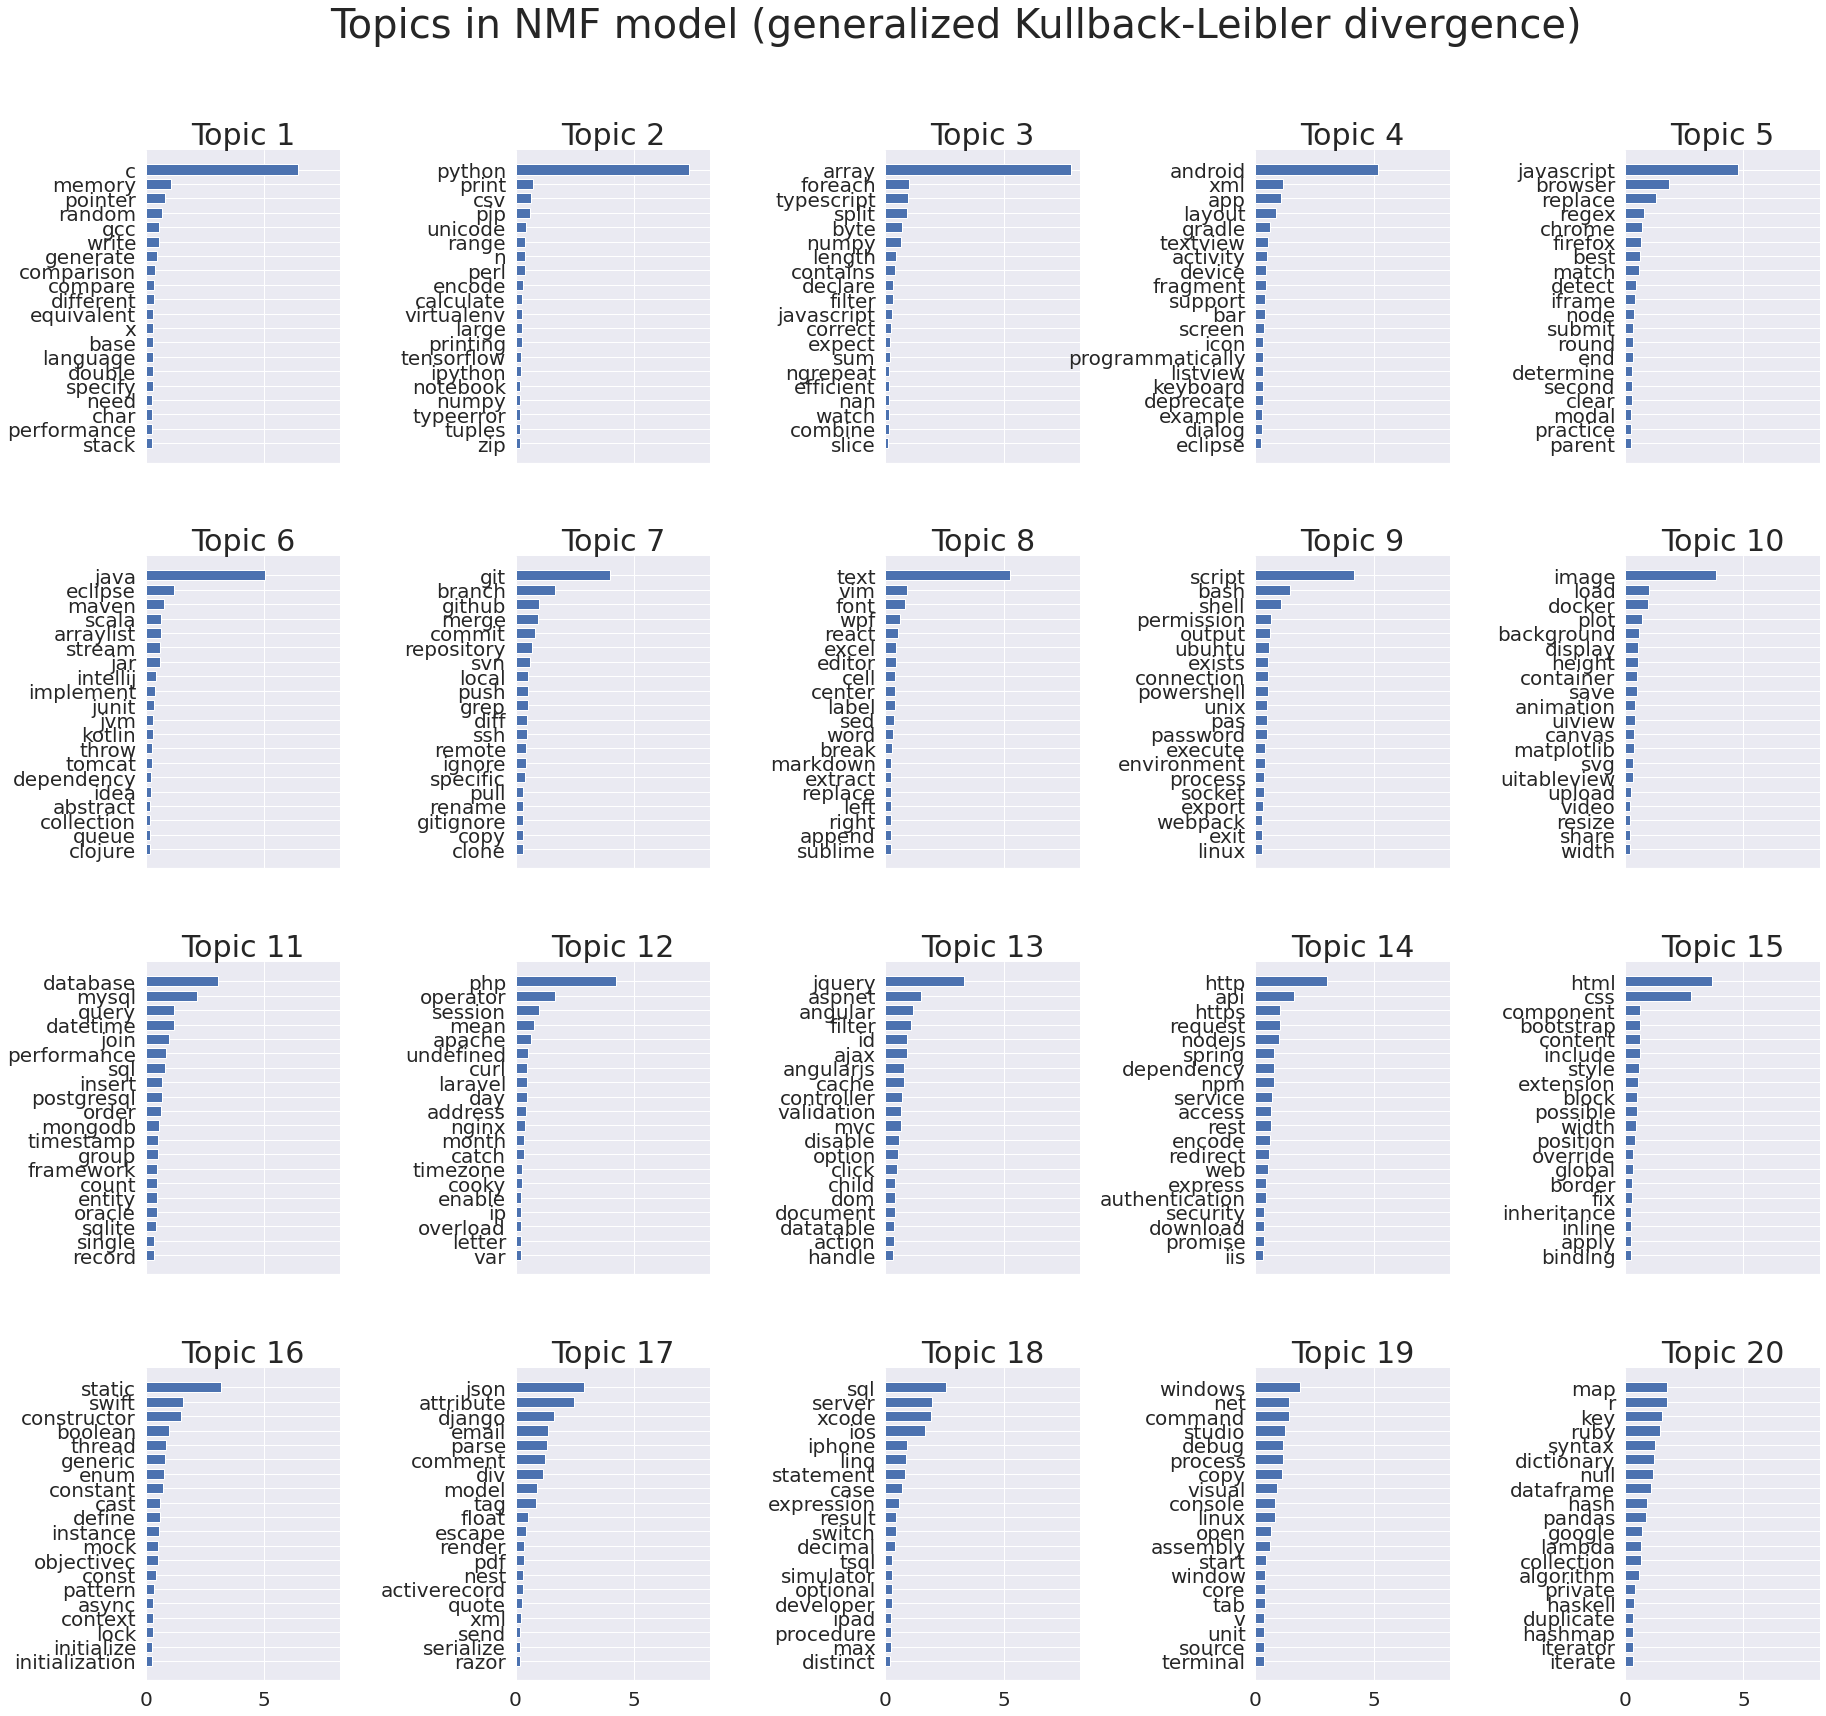

In [ ]:
n_samples = 100000
n_features = 10000
n_components = 20
n_top_words = 20

all_data = body_title_filter

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.15, min_df=20,
                                   max_features=n_features,
                                   token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(all_data)
print("done in %0.3fs." % (time() - t0))


# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

## NMF model

Extracting tf-idf features for NMF...
done in 1.198s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=100000 and n_features=10000...
done in 14.483s.


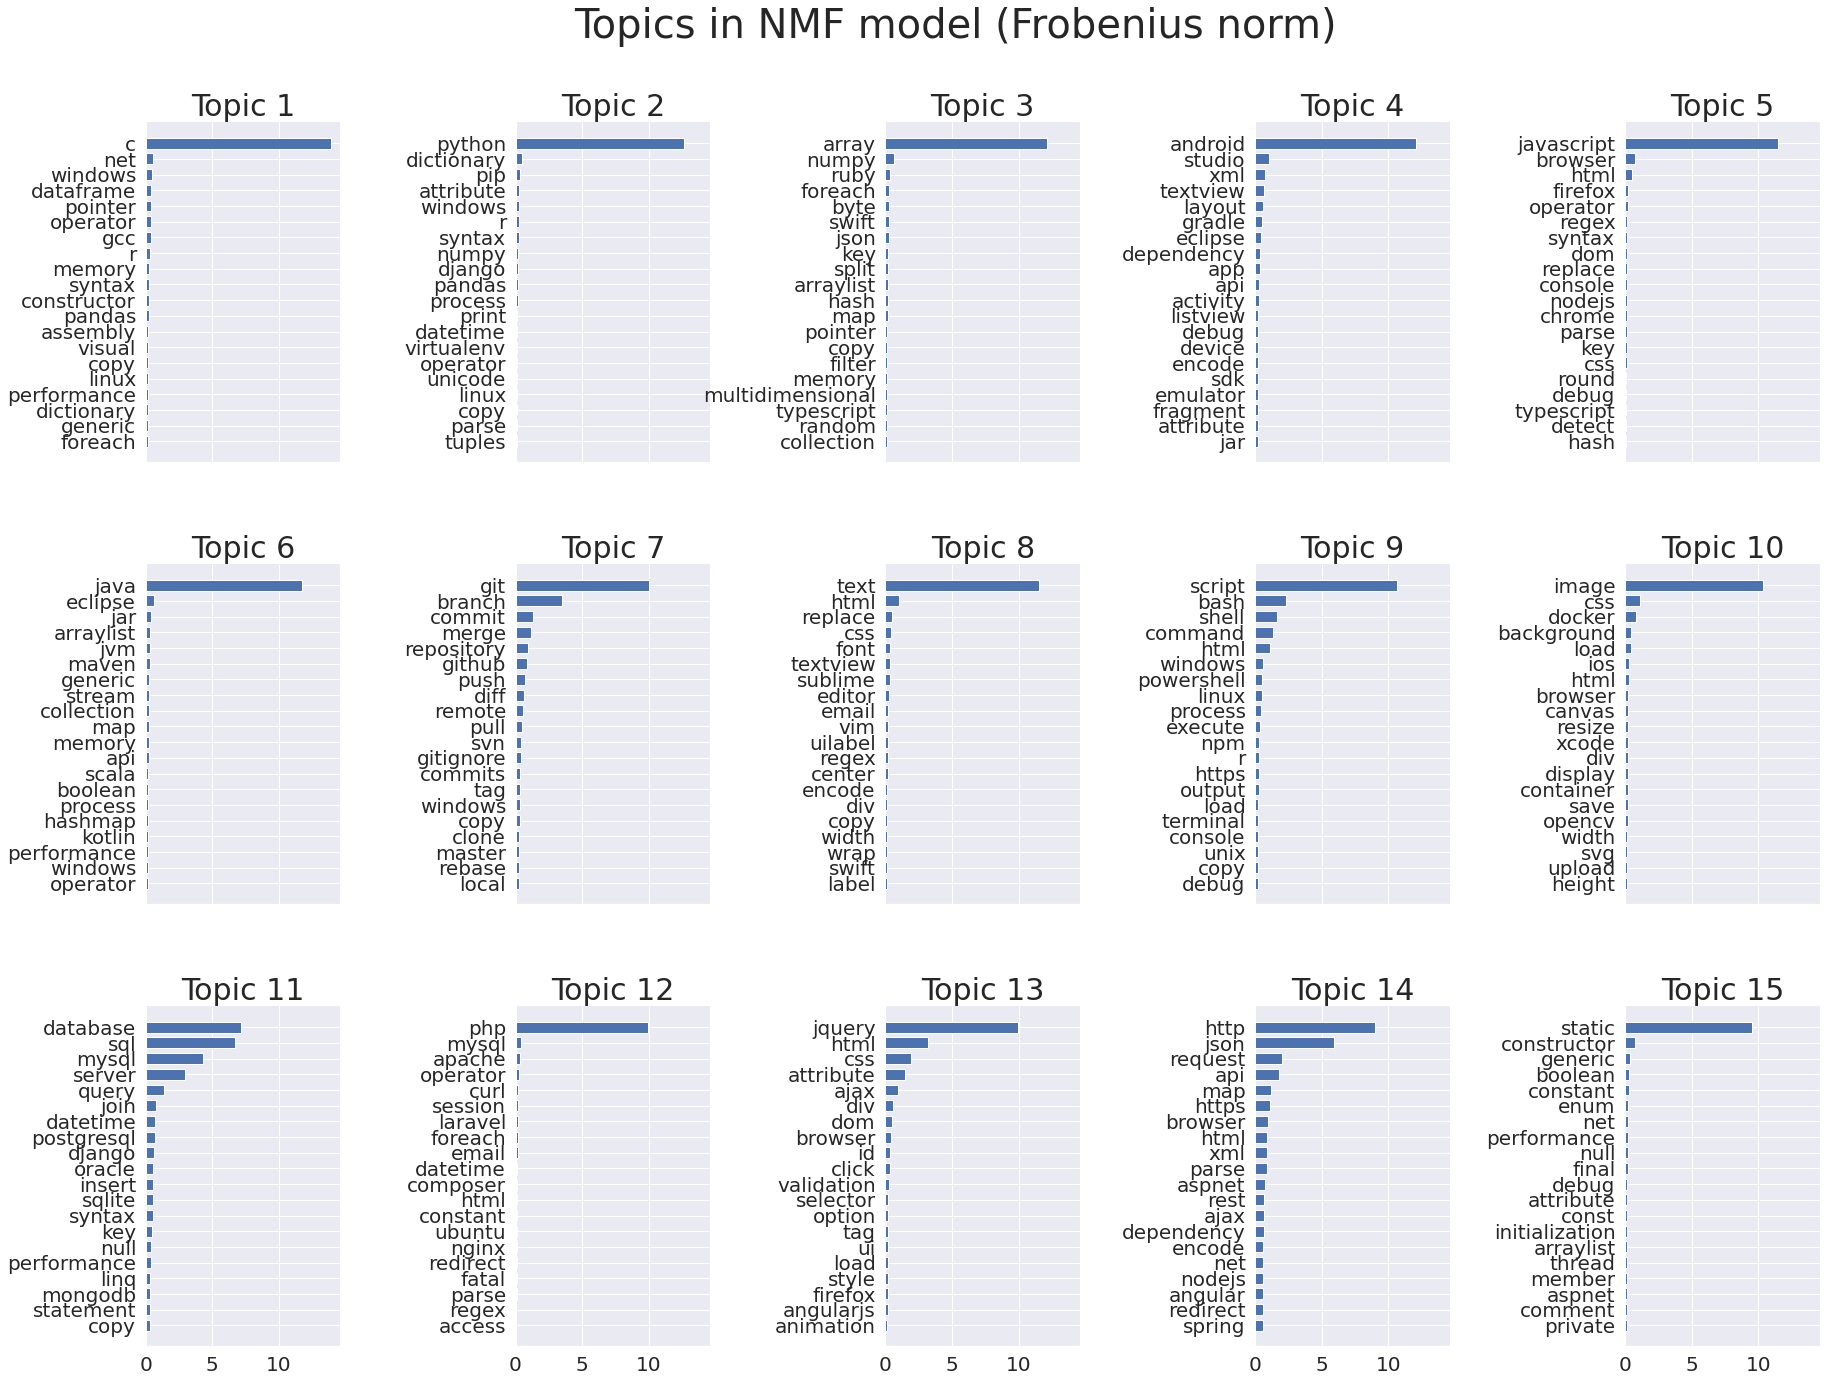

In [ ]:
n_samples = 100000
n_features = 10000
n_components = 15
n_top_words = 20

all_data = body_title_filter

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3, 5, figsize=(30, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.15, min_df=20,
                                   max_features=n_features,
                                   token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(all_data)
print("done in %0.3fs." % (time() - t0))


# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

In [ ]:
len(tfidf_feature_names)

1864

In [ ]:
nmf.components_.shape

(15, 1864)

In [ ]:
print(metric_coherence_gensim(measure='c_v', 
                      top_n=30, 
                      topic_word_distrib=nmf.components_, 
                      dtm=tfidf, 
                      vocab=np.array(tfidf_feature_names), 
                      texts=all_data.apply(lambda x : word_tokenize(x)),
                      return_mean=True))

0.40043093412032726


  - coherence score with LDA: 0.35
  - coherence score with NMF: 0.4

  Besides, the topics look way more clustered with NMF than LDA. NMF is therefore a better choice.


In [ ]:
pickle.dump(tfidf_vectorizer, open('/tfidf_vectorizer.pkl', 'wb'))
pickle.dump(tfidf, open('/tfidf.pkl', 'wb'))
pickle.dump(nmf, open('/nmf.pkl', 'wb'))

## Doc-Topic matrix

In [ ]:
nmf.transform(tfidf)[0]

array([0.        , 0.        , 0.00019494, 0.        , 0.        ,
       0.        , 0.00048917, 0.        , 0.        , 0.        ,
       0.00338274, 0.00767794, 0.        , 0.00042444, 0.        ])

In [ ]:
# Create Document - Topic Matrix
nmf_output = nmf.transform(tfidf)

# column names
topicnames = ["Topic" + str(i) for i in range(nmf.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(tfidf.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .001 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .001 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
Doc0,0.000000,0.000000,0.000190,0.000000,0.000000,0.000000,0.000490,0.000000,0.000000,0.000000,0.003380,0.007680,0.000000,0.000420,0.000000,11
Doc1,0.000110,0.000000,0.000000,0.000000,0.000000,0.000420,0.000000,0.000000,0.000000,0.000000,0.001930,0.034840,0.000000,0.000010,0.001400,11
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000,0.000000,0.000810,0.000000,0.000000,0.002470,0.000180,13
Doc3,0.000120,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,13
Doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050410,0.000000,0.000000,0.000000,0.018560,10
Doc5,0.000260,0.000180,0.000000,0.003800,0.000000,0.000910,0.000000,0.000080,0.000000,0.000000,0.000240,0.000000,0.001950,0.006030,0.000670,13
Doc6,0.000000,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000160,0.000380,0.000170,0.000000,0.000000,0.001430,0.001820,0.000000,13
Doc7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,0.000590,0.000000,13
Doc8,0.024880,0.000000,0.000200,0.000000,0.000000,0.000610,0.000000,0.000000,0.000000,0.000000,0.000390,0.000000,0.000000,0.000000,0.000040,0
Doc9,0.003520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [ ]:
# df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
# df_topic_distribution.columns = ['Topic Num', 'Num Documents']
# df_topic_distribution

## Topic-keywords

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=tfidf_vectorizer, model=nmf, n_words=20):
    keywords = np.array(tfidf_vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in nmf.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords_nmf = show_topics(vectorizer=tfidf_vectorizer, model=nmf, n_words=700)        

# Topic - Keywords Dataframe
df_topic_keywords_nmf = pd.DataFrame(topic_keywords_nmf)
df_topic_keywords_nmf.columns = ['Word '+str(i) for i in range(df_topic_keywords_nmf.shape[1])]
df_topic_keywords_nmf.index = ['Topic '+str(i) for i in range(df_topic_keywords_nmf.shape[0])]
# df_topic_keywords_nmf

In [ ]:
pickle.dump(df_topic_keywords_nmf, open('/df_topic_keywords_nmf.pkl', 'wb'))

## Evaluation

In [ ]:
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
Doc0,0.00000,0.0,0.00019,0.00000,0.0,0.00000,0.00049,0.0,0.00000,0.00000,0.00338,0.00768,0.00000,0.00042,0.00000,11
Doc1,0.00011,0.0,0.00000,0.00000,0.0,0.00042,0.00000,0.0,0.00000,0.00000,0.00193,0.03484,0.00000,0.00001,0.00140,11
Doc2,0.00000,0.0,0.00000,0.00000,0.0,0.00030,0.00000,0.0,0.00000,0.00000,0.00081,0.00000,0.00000,0.00247,0.00018,13
Doc3,0.00012,0.0,0.00000,0.00002,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00020,0.00000,13
Doc4,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.05041,0.00000,0.00000,0.00000,0.01856,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc100423,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.01242,0.00000,0.00000,0.00000,0.00602,0.00478,0.00000,8
Doc100424,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00076,0.0,0.00963,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8
Doc100425,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.02841,0.0,0.00000,0.00000,0.00018,0.00000,0.00000,0.00000,0.00000,6
Doc100426,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00024,0.00524,0.00758,0.00035,0.00000,0.00000,0.00000,10


In [ ]:
df_document_topic=df_document_topic.iloc[:,:-1]

In [ ]:
df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14
Doc0,0.00000,0.00000,0.00019,0.00000,0.0000,0.00000,0.00049,0.00000,0.00000,0.00000,0.00338,0.00768,0.00000,0.00042,0.00000
Doc1,0.00011,0.00000,0.00000,0.00000,0.0000,0.00042,0.00000,0.00000,0.00000,0.00000,0.00193,0.03484,0.00000,0.00001,0.00140
Doc2,0.00000,0.00000,0.00000,0.00000,0.0000,0.00030,0.00000,0.00000,0.00000,0.00000,0.00081,0.00000,0.00000,0.00247,0.00018
Doc3,0.00012,0.00000,0.00000,0.00002,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00020,0.00000
Doc4,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05041,0.00000,0.00000,0.00000,0.01856
Doc5,0.00026,0.00018,0.00000,0.00380,0.0000,0.00091,0.00000,0.00008,0.00000,0.00000,0.00024,0.00000,0.00195,0.00603,0.00067
Doc6,0.00000,0.00000,0.00000,0.00000,0.0013,0.00000,0.00000,0.00016,0.00038,0.00017,0.00000,0.00000,0.00143,0.00182,0.00000
Doc7,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00000,0.00059,0.00000
Doc8,0.02488,0.00000,0.00020,0.00000,0.0000,0.00061,0.00000,0.00000,0.00000,0.00000,0.00039,0.00000,0.00000,0.00000,0.00004
Doc9,0.00352,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [ ]:
(df_document_topic>0.00001).sum(axis=1).sum()

324063

In [ ]:
# df_pos=[]
# for i in range(len(df_document_topic)):

#   n_largest = 15-(df_document_topic.iloc[i,:]>.00001).value_counts()[0]
#   arg = list(df_document_topic.iloc[i,:].argsort()[:-n_largest-1:-1].values)

#   df_pos.append(arg)

In [ ]:
df_pos=[]
for i in range(len(df_document_topic)):

  # n_largest = 15-(df_document_topic.iloc[i,:]>.00001).value_counts()[0]
  arg = list(df_document_topic.iloc[i,:].argsort()[:-15-1:-1].values)

  df_pos.append(arg)

In [ ]:
df_pos[:10]

[[11, 10, 6, 13, 2, 14, 12, 9, 8, 7, 5, 4, 3, 1, 0],
 [11, 10, 14, 5, 0, 13, 12, 9, 8, 7, 6, 4, 3, 2, 1],
 [13, 10, 5, 14, 12, 11, 9, 8, 7, 6, 4, 3, 2, 1, 0],
 [13, 0, 3, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 2, 1],
 [10, 14, 13, 12, 11, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [13, 3, 12, 5, 14, 0, 10, 1, 7, 11, 9, 8, 6, 4, 2],
 [13, 12, 4, 8, 9, 7, 14, 11, 10, 6, 5, 3, 2, 1, 0],
 [13, 11, 14, 12, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [0, 5, 10, 2, 14, 13, 12, 11, 9, 8, 7, 6, 4, 3, 1],
 [0, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]]

In [ ]:
body_title_token_filter

0         [password, hash, blowfish, hash, algorithm, bl...
1                        [null, null, php, null, null, php]
2                                       [hibernate, spring]
3         [bootstrapping, assembly, bootstrapping, outsi...
4         [deadlock, sql, server, database, deadlock, de...
                                ...                        
100423    [jquery, prop, prop, attr, prop, attr, prop, a...
100424              [alias, alias, bash, bash, bash, alias]
100425    [reset, svn, svn, svn, git, git, reset, hard, ...
100426    [nginx, docker, container, mysql, localhost, c...
100427    [java, mac, oracle, java, java, java, java, ja...
Length: 100428, dtype: object

In [ ]:
tag_list=[]
for i,l in enumerate(df_pos):
  tag=[]
  for e in l:
    for w in df_topic_keywords_nmf.iloc[e,:50]:
       if w in word_tokenize(body_title_token_filter[i]):
         tag.append(w)
  if len(tag)>5:
    tag_list.append(set(tag[:5]))
  else:
    tag_list.append(set(tag))

In [ ]:
pd.Series(tag_list).apply(lambda x: len(x)).value_counts()

2    25224
3    22744
1    19264
4    16084
5     9835
0     7277
dtype: int64

In [ ]:
pd.Series(tag_list)[:25]

0     {password, comment, hash, php, constant}
1                                  {null, php}
2                                     {spring}
3                          {assembly, support}
4        {server, database, sql, static, linq}
5                             {xml, attribute}
6              {validation, security, firefox}
7                                       {curl}
8                                  {c, memory}
9                 {label, matplotlib, c, plot}
10                                         {r}
11                           {c, windows, net}
12                 {studio, visual, c, branch}
13            {mobile, server, device, github}
14                 {svn, commandline, eclipse}
15                        {angular, angularjs}
16            {execute, split, c, script, sql}
17     {html, replace, comment, script, email}
18                                {validation}
19                                   {windows}
20                                 {html, tag}
21           

In [ ]:
df_compare_tags = pd.concat([pd.Series(tag_list),tags_cleaned], axis=1)

In [ ]:
df_compare_tags[1100:1155]

,0,Tags_cleaned
1100,"{api, linux, process}","[linux, winapi, visualc, unix, timer]"
1101,"{java, access, php}","[java, php, oop, theory]"
1102,"{mysql, server, database, datetime, sql}","[mysql, sqlserver, csv, bcp]"
1103,"{track, javascript}","[php, apache, log, download, analytics]"
1104,"{svn, net, web, windows, aspnet}","[net, aspnet, svn, versioning]"
1105,"{html, browser, script}","[c, html, webservices, printing]"
1106,"{mysql, replace, server, sql}","[mysql, sqlserver]"
1107,"{assembly, database, net, c, script}","[c, net, script, compilerconstruction]"
1108,{java},"[languageagnostic, type]"
1109,{iphone},"[objectivec, landscape, ios]"


In [ ]:
df_compare_tags['Tags_predict']=df_compare_tags[0].apply(lambda x: list(set(x)))

In [ ]:
'php' in body_token[0], 'php' in title_token[0]

(True, False)

In [ ]:
body_title_filter[0]

'password hash blowfish hash algorithm blowfish password php password password hash password password password hash password password blowfish password password password blowfish password hash database database constant dictionary hash password blowfish hash password php hash password password password hash password hash hash password password password hash blowfish hash php comment https hash password blowfish'

In [ ]:
df_compare_tags[:15]

,0,Tags_cleaned,Tags_predict
0,"{password, comment, hash, php, constant}","[php, security, hash, password, blowfish]","[constant, password, comment, hash, php]"
1,"{null, php}","[php, null]","[null, php]"
2,{spring},"[java, spring, hibernate]",[spring]
3,"{assembly, support}","[compilerconstruction, bootstrapping]","[assembly, support]"
4,"{server, database, sql, static, linq}","[sqlserver, deadlock]","[server, database, static, linq, sql]"
5,"{xml, attribute}","[c, xml, inheritance, serialization, xmlserial...","[xml, attribute]"
6,"{validation, security, firefox}","[firefox, ssl]","[validation, security, firefox]"
7,{curl},"[iphone, uipageviewcontroller, ios]",[curl]
8,"{c, memory}","[c, memory]","[c, memory]"
9,"{label, matplotlib, c, plot}","[python, matplotlib, plot, grid, label]","[label, matplotlib, c, plot]"


In [ ]:
tags_c=[]
for list1 in df_compare_tags['Tags_cleaned']:
  for e in list1:
    tags_c.append(e)

In [ ]:
len(tags_c), len(set(tags_c))

(288092, 12677)

In [ ]:
tags_p=[]
for list1 in df_compare_tags['Tags_predict']:
  for e in list1:
    tags_p.append(e)

In [ ]:
len(tags_p), len(set(tags_p))

(251455, 380)

In [ ]:
len(set(tags_c + tags_p))

12740

In [ ]:
all_tags=list(set(tags_c+tags_p))

In [ ]:
len(all_tags)

12740

In [ ]:
all_tags_dict={}
for i,t in enumerate(all_tags):
  all_tags_dict[t]=i


In [ ]:
df_compare_tags['Tags_cleaned_Jaccard'] = df_compare_tags['Tags_cleaned'].apply(lambda x: [all_tags_dict[e] for e in x])
df_compare_tags['Tags_predict_Jaccard'] = df_compare_tags['Tags_predict'].apply(lambda x: [all_tags_dict[e] for e in x])

In [ ]:
df_compare_tags

,0,Tags_cleaned,Tags_predict,Tags_cleaned_Jaccard,Tags_predict_Jaccard
0,"{password, comment, hash, php, constant}","[php, security, hash, password, blowfish]","[constant, password, comment, hash, php]","[9346, 4754, 1470, 7103, 5419]","[2294, 7103, 726, 1470, 9346]"
1,"{null, php}","[php, null]","[null, php]","[9346, 4349]","[4349, 9346]"
2,{spring},"[java, spring, hibernate]",[spring],"[10041, 1563, 4210]",[1563]
3,"{assembly, support}","[compilerconstruction, bootstrapping]","[assembly, support]","[6531, 7778]","[5921, 4173]"
4,"{server, database, sql, static, linq}","[sqlserver, deadlock]","[server, database, static, linq, sql]","[9085, 2531]","[2436, 4876, 4021, 5477, 11705]"
...,...,...,...,...,...
100423,"{http, script, https, jquery, console}","[javascript, jquery, dom, attr, prop]","[http, https, jquery, console, script]","[10126, 3369, 9569, 12315, 1162]","[12540, 3926, 3369, 767, 4106]"
100424,{bash},"[bash, alias]",[bash],"[6743, 11903]",[6743]
100425,"{svn, copy, reset, git}",[git],"[svn, copy, reset, git]",[12526],"[4806, 1223, 1760, 12526]"
100426,"{mysql, docker, container, connect}","[nginx, docker, reverseproxy, dockernetworking]","[mysql, docker, container, connect]","[3867, 1538, 4069, 6221]","[10161, 1538, 8799, 6741]"


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score([88,99], [88,99], average='micro')

1.0

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))
list1 = [12321, 4095, 1814, 11768, 8255]	
list2 = [8067, 1814, 3948, 11768]
jaccard_similarity(list1, list2)

0.2857142857142857

In [ ]:
jaccard=[]
for i in range(len(df_compare_tags)):
  list1= df_compare_tags['Tags_cleaned_Jaccard'][i]
  list2= df_compare_tags['Tags_predict_Jaccard'][i]
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts()

0.00    34151
0.33    11791
0.25    11080
0.20     9474
0.50     9376
0.17     6639
0.40     3866
0.14     3730
0.67     2583
1.00     2496
0.12     1619
0.29     1455
0.60      731
0.75      593
0.11      555
0.43      232
0.80       57
dtype: int64

In [ ]:
(pd.Series(jaccard)>0.).value_counts()

True     66277
False    34151
dtype: int64

In [ ]:
pd.Series(jaccard).mean()

0.22278308838177824

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=tfidf, lda_model=nmf, n_words=20):
    keywords = np.array(tf_vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in nmf.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf, lda_model=nmf, n_words=700)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Word 30,Word 31,Word 32,Word 33,Word 34,Word 35,Word 36,Word 37,Word 38,Word 39,...,Word 660,Word 661,Word 662,Word 663,Word 664,Word 665,Word 666,Word 667,Word 668,Word 669,Word 670,Word 671,Word 672,Word 673,Word 674,Word 675,Word 676,Word 677,Word 678,Word 679,Word 680,Word 681,Word 682,Word 683,Word 684,Word 685,Word 686,Word 687,Word 688,Word 689,Word 690,Word 691,Word 692,Word 693,Word 694,Word 695,Word 696,Word 697,Word 698,Word 699
Topic 0,c,net,windows,dataframe,pointer,operator,gcc,r,memory,syntax,constructor,pandas,assembly,visual,copy,linux,performance,dictionary,generic,foreach,process,debug,cast,studio,replace,split,powershell,console,compilation,algorithm,dll,datetime,comment,parse,enum,char,map,linq,lambda,constant,...,question,pdo,peer,press,percentage,relativelayout,pem,people,pylint,relationship,reject,preserve,relation,query,reload,queryset,play,render,prototype,repository,properly,proper,prop,privilege,pro,procedure,request,progress,processing,requirejs,produce,requirement,production,provide,provider,provision,primitive,pause,patch,push
Topic 1,python,dictionary,pip,attribute,windows,r,syntax,numpy,django,pandas,process,print,datetime,virtualenv,operator,unicode,linux,copy,parse,tuples,encode,split,csv,dataframe,lambda,memory,ubuntu,replace,join,importerror,random,comparison,terminal,matplotlib,ruby,plot,ipython,key,installation,debug,...,nullable,null,z,nuget,zindex,zone,nth,nsuserdefaults,nsstring,observable,obsolete,obtain,yarn,xampp,opacity,xcode,xib,online,onclick,onchange,overwrite,xmlhttprequest,xor,xpath,xsd,offset,offline,xslt,occur,ok,p,pack,packagejson,persist,permit,viewpager,viewport,violation,period,virtualbox
Topic 2,array,numpy,ruby,foreach,byte,swift,json,key,split,arraylist,hash,map,pointer,copy,filter,memory,multidimensional,typescript,random,collection,algorithm,syntax,length,initialize,associative,performance,duplicate,bash,email,contains,initialization,iterate,join,merge,declare,dictionary,mongodb,boolean,cast,order,...,translate,tick,thrown,throw,threadsafe,thread,thing,theme,tfs,textview,textfield,timeout,textbox,textarea,text,ternary,terminology,terminate,terminal,term,tensorflow,temporary,tell,textblock,transparent,timer,timezone,transition,transfer,transaction,trait,track,trace,touch,total,tostring,tortoisesvn,timestamps,topic,toolbar
Topic 3,android,studio,xml,textview,layout,gradle,eclipse,dependency,app,api,activity,listview,debug,device,encode,sdk,emulator,fragment,attribute,jar,edittext,permission,visual,adb,boolean,icon,apk,recyclerview,background,programmatically,http,process,drawable,animation,toolbar,service,imageview,bar,junit,resource,...,qt,order,predicate,prototype,protect,printf,print,output,primitive,prime,primary,printing,previous,overflow,preserve,preprocessor,prefix,overhead,prefer,pretty,private,privilege,pro,properly,proper,prop,orderby,organize,prompt,promise,programmer,origin,original,orm,osx,processing,outer,procedure,protocol,abort
Topic 4,javascript,browser,html,firefox,operator,regex,syntax,dom,replace,console,nodejs,chrome,parse,key,css,round,debug,typescript,detect,hash,ajax,undefined,equivalent,constructor,iframe,performance,access,load,crossbrowser,best,onclick,pas,inheritance,var,null,comparison,split,comment,prototype,map,...,serial,request,txt,twitter,twig,twice,tutorial,tuples,tuple,tsql,trycatch,typed,trust,transparent,translate,transition,transform,transfer,transaction,trait,trail,track,tree,typedef,typeerror,u,undo,understand,underline,unavailable,unable,uiviewcontroller,uiview,uitextview,uitextfield,uitableviewcell,uitableview,uiscrollview,uilabel,uikit
Topic 5,java,eclipse,jar,arraylist,jvm,maven,generic,stream,collection,map,memory,api,scala,boolean,process,hashmap,kotlin,performance,windows,operator,byte,construc

# OVR Multilabel

In [ ]:
top_402_tags[:10]

['php',
 'security',
 'hash',
 nan,
 'java',
 'spring',
 'hibernate',
 'compilerconstruction',
 'sqlserver',
 'c']

In [ ]:
tags_cleaned[:10]

0            [php, security, hash, password, blowfish]
1                                          [php, null]
2                            [java, spring, hibernate]
3                [compilerconstruction, bootstrapping]
4                                [sqlserver, deadlock]
5    [c, xml, inheritance, serialization, xmlserial...
6                                       [firefox, ssl]
7                  [iphone, uipageviewcontroller, ios]
8                                          [c, memory]
9              [python, matplotlib, plot, grid, label]
Name: Tags_cleaned, dtype: object

In [ ]:
mlb = MultiLabelBinarizer(classes=top_402_tags[:10])
mlb_binary = mlb.fit_transform(tags_cleaned[:3])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:861: UserWarning: unknown class(es) ['blowfish', 'null', 'password'] will be ignored
  .format(sorted(unknown, key=str)))


In [ ]:
mlb.classes_

array(['php', 'security', 'hash', nan, 'java', 'spring', 'hibernate',
       'compilerconstruction', 'sqlserver', 'c'], dtype=object)

In [ ]:
mlb.inverse_transform(mlb_binary)

[('php', 'security', 'hash'), ('php',), ('java', 'spring', 'hibernate')]

**Transform target tags using MultiLabelBinrizer**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=top_402_tags, sparse_output=True)
Y_mlb = mlb.fit_transform(tags_cleaned)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:861: UserWarning: unknown class(es) ['aabb', 'aapt', 'aar', 'abaddressbook', 'abap', 'abbreviation', 'abc', 'abi', 'ablyrealtime', 'abort', 'absolute', 'absolutepath', 'absolutevalue', 'abstract', 'abstractclass', 'abstractdatatype', 'abstractfactory', 'abstractfunction', 'abstraction', 'abstractmethods', 'abstractsyntaxtree', 'abstracttype', 'abtesting', 'accelerateframework', 'acceleration', 'accelerometer', 'acceptancetesting', 'accesscontrol', 'accessdenied', 'accessibility', 'accessibilityservice', 'accesskeys', 'accesslevels', 'accesslog', 'accessmodifiers', 'accessor', 'accessrights', 'accessspecifier', 'accesstoken', 'accordion', 'account', 'accounting', 'accountmanager', 'accumulate', 'accurev', 'ace', 'aceeditor', 'aceoledb', 'achartengine', 'acid', 'ack', 'acl', 'acrobat', 'acronym', 'action', 'actionbarsherlock', 'actioncontroller', 'actionfilter', 'actionfilterattribute', 'actionlink', 'actionlistener',

In [ ]:
# pickle.dump(mlb, open('/content/drive/My Drive/OpenClassrooms/PStackOverfow_fatmi_amine/mlb_svc.pkl', 'wb'))

In [ ]:
mlb.classes_.size

402

In [ ]:
Y_mlb.shape

(100428, 402)

**Transform body_title_filter using TFIDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=10,
                                   max_features= 10000,
                                   token_pattern = r"(?u)\b\w+\b", # default=r"(?u)\b\w\w+\b", modified to avoid ignoring single letters like 'C' or 'R'
                                   stop_words=None)

In [ ]:
t0 = time()
X_tfidf = tfidf_vectorizer.fit_transform(body_title_filter)
print("done in %0.3fs." % (time() - t0))

done in 1.652s.


In [ ]:
# pickle.dump(tfidf_vectorizer, open('/content/drive/My Drive/OpenClassrooms/PStackOverfow_fatmi_amine/tfidf_vectorizer_svc.pkl', 'wb'))

In [ ]:
X_tfidf.shape

(100428, 2868)

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
indices = np.arange(100428)
X_train, X_test, Y_train, Y_test, id1, id2 = train_test_split(X_tfidf,Y_mlb, indices, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((80342, 2868), (80342, 402), (20086, 2868), (20086, 402))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## **OVR + LinearSVC**

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 45.912s.


In [ ]:
# pickle.dump(ovr, open('/content/drive/My Drive/OpenClassrooms/PStackOverfow_fatmi_amine/ovr_linearsvc.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 (),
 (),
 (),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('git', 'mercurial'),
 ('android',),
 ('python', 'random'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('angularjs',),
 (),
 ('java',),
 ('android', 'gradle')]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python', 'random']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.310565
1.00    0.258339
0.50    0.215225
0.33    0.107090
0.67    0.054117
0.25    0.035995
0.20    0.006771
0.75    0.005178
0.40    0.004531
0.60    0.001294
0.17    0.000448
0.80    0.000249
0.14    0.000149
0.29    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.45468535298217283

The jaccard score on the test set is 0.45.

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.336553
0.50    0.170666
0.33    0.153689
0.25    0.101265
1.00    0.094892
0.67    0.051279
0.20    0.050981
0.40    0.022205
0.17    0.007269
0.75    0.005327
0.60    0.004182
0.14    0.000797
0.80    0.000548
0.29    0.000249
0.12    0.000050
0.43    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.31808324205913313

## **OVR + Multinomial_NB**

In [ ]:
ovr = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 8.658s.


In [ ]:
# pickle.dump(ovr, open('/ovr_linearsvc.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 (),
 (),
 (),
 (),
 (),
 ('python',),
 (),
 ('git',),
 (),
 ('python',),
 (),
 ('c',),
 ('java', 'log'),
 ('jquery',),
 (),
 ('angularjs',),
 (),
 ('java',),
 ('android',)]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.675097
1.00    0.125610
0.50    0.108732
0.33    0.060838
0.25    0.018620
0.67    0.007319
0.20    0.002788
0.40    0.000697
0.17    0.000149
0.75    0.000149
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.21058498456636163

The jaccard score on the test set is 0.45.

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.707806
0.33    0.084586
0.50    0.077815
0.25    0.056407
1.00    0.032510
0.20    0.029423
0.67    0.006472
0.40    0.003385
0.17    0.001245
0.75    0.000199
0.14    0.000100
0.60    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.12541322314049314

## **OVR + LogisticReg**

In [ ]:
ovr = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 125.950s.


In [ ]:
# pickle.dump(ovr, open('/ovr_logreg.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 ('c',),
 (),
 (),
 (),
 (),
 ('python', 'matplotlib'),
 ('python',),
 ('git', 'versioncontrol', 'mercurial'),
 ('android',),
 ('python',),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('angularjs',),
 (),
 ('java',),
 ('android',)]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.392662
1.00    0.220801
0.50    0.193070
0.33    0.100767
0.67    0.043712
0.25    0.032859
0.20    0.006771
0.40    0.003834
0.75    0.003535
0.60    0.000996
0.17    0.000697
0.80    0.000149
0.14    0.000100
0.43    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.3944996514985516

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.421637
0.50    0.148711
0.33    0.140098
0.25    0.093448
1.00    0.079458
0.20    0.045405
0.67    0.039679
0.40    0.017823
0.17    0.005526
0.75    0.004331
0.60    0.002539
0.14    0.000697
0.80    0.000349
0.29    0.000199
0.43    0.000100
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.2723917156228117

## **OVR + DecisionTree**

In [ ]:
ovr = OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 1122.922s.


In [ ]:
# pickle.dump(ovr, open('/ovr_dectree.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 ('c', 'net'),
 (),
 (),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('git', 'mercurial'),
 ('java', 'android', 'winforms'),
 ('python', 'random', 'numpy'),
 ('python',),
 ('c',),
 ('java', 'log'),
 ('jquery', 'text'),
 (),
 ('angularjs', 'intellijidea'),
 ('database', 'filter', 'join'),
 ('java',),
 ('java',
  'database',
  'android',
  'androidstudio',
  'build',
  'androidgradleplugin')]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python', 'random', 'numpy']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.255551
0.50    0.216967
1.00    0.190979
0.33    0.135667
0.25    0.070596
0.67    0.062830
0.20    0.024544
0.40    0.017027
0.75    0.008613
0.17    0.007418
0.60    0.004182
0.14    0.001842
0.29    0.001743
0.80    0.000747
0.43    0.000548
0.12    0.000299
0.11    0.000199
0.57    0.000100
0.30    0.000050
0.38    0.000050
0.22    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.42768246539877763

The jaccard score on the test set is 0.45.

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.272976
0.33    0.157921
0.50    0.157025
0.25    0.120183
0.20    0.075376
1.00    0.069700
0.67    0.050582
0.40    0.034502
0.17    0.029125
0.14    0.007966
0.75    0.007219
0.60    0.006920
0.29    0.004481
0.12    0.002191
0.43    0.001294
0.80    0.000846
0.11    0.000597
0.38    0.000299
0.22    0.000249
0.10    0.000249
0.57    0.000149
0.18    0.000100
0.30    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.31194414019713784

## **OVR + KNN**

In [ ]:
ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 12.622s.


In [ ]:
# pickle.dump(ovr, open('/ovr_dectree.pkl', 'wb'))

In [1]:
prediction = ovr.predict(X_test)
# prediction_tags = mlb.inverse_transform(prediction)
# test_tags = mlb.inverse_transform(Y_test)

In [2]:
prediction_tags[:20]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python', 'random', 'numpy']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.255551
0.50    0.216967
1.00    0.190979
0.33    0.135667
0.25    0.070596
0.67    0.062830
0.20    0.024544
0.40    0.017027
0.75    0.008613
0.17    0.007418
0.60    0.004182
0.14    0.001842
0.29    0.001743
0.80    0.000747
0.43    0.000548
0.12    0.000299
0.11    0.000199
0.57    0.000100
0.30    0.000050
0.38    0.000050
0.22    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.42768246539877763

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.272976
0.33    0.157921
0.50    0.157025
0.25    0.120183
0.20    0.075376
1.00    0.069700
0.67    0.050582
0.40    0.034502
0.17    0.029125
0.14    0.007966
0.75    0.007219
0.60    0.006920
0.29    0.004481
0.12    0.002191
0.43    0.001294
0.80    0.000846
0.11    0.000597
0.38    0.000299
0.22    0.000249
0.10    0.000249
0.57    0.000149
0.18    0.000100
0.30    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.31194414019713784

## **OVR + LinearSVC optim1** best model

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(dual=False, penalty='l1', C=2), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 266.751s.


In [ ]:
# pickle.dump(ovr, open('/ovr_linearsvc_op1.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 ('c',),
 (),
 (),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('git', 'mercurial'),
 ('android',),
 ('python', 'random'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('angularjs',),
 (),
 ('java',),
 ('android', 'androidstudio', 'gradle')]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python', 'random']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.300956
1.00    0.260380
0.50    0.218411
0.33    0.107139
0.67    0.056706
0.25    0.035846
0.20    0.007269
0.75    0.005974
0.40    0.004431
0.60    0.001643
0.17    0.000548
0.80    0.000349
0.14    0.000149
0.29    0.000100
0.43    0.000100
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.46105347007865827

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.326446
0.50    0.174749
0.33    0.153490
0.25    0.101563
1.00    0.095240
0.67    0.052972
0.20    0.051578
0.40    0.022852
0.17    0.008215
0.75    0.005974
0.60    0.004929
0.14    0.000747
0.80    0.000647
0.29    0.000349
0.43    0.000199
0.12    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.32325450562579644

## **OVR + LinearSVC optim2**

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(dual=False, penalty='l2', C=2), n_jobs=-1)

t0 = time()
ovr.fit(X_train, Y_train)
print("done in %0.3fs." % (time() - t0))

done in 47.843s.


In [ ]:
# pickle.dump(ovr, open('/ovr_linearsvc_op1.pkl', 'wb'))

In [ ]:
prediction = ovr.predict(X_test)
prediction_tags = mlb.inverse_transform(prediction)
test_tags = mlb.inverse_transform(Y_test)

In [ ]:
prediction_tags[:20]

[(),
 (),
 (),
 (),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('git', 'mercurial'),
 ('android',),
 ('python', 'random'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('angularjs',),
 (),
 ('java',),
 ('android', 'androidstudio', 'gradle')]

In [ ]:
test_tags[:20]

[('python',),
 ('c', 'net'),
 ('tfs',),
 ('jquery', 'html'),
 (),
 ('javascript',),
 ('python', 'matplotlib'),
 ('python',),
 ('mercurial', 'git'),
 ('android',),
 ('numpy', 'python'),
 ('csv',),
 ('c',),
 ('java', 'log'),
 ('javascript', 'jquery'),
 (),
 ('javascript', 'jquery', 'angularjs'),
 ('java',),
 ('java',),
 ('androidgradleplugin', 'android', 'androidstudio', 'gradle')]

**Evaluation**

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
range(len(prediction_tags))

range(0, 20086)

In [ ]:
list(prediction_tags[10])

['python', 'random']

In [ ]:
jaccard=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(test_tags[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard.append(round(jc,2))
  else:
    jaccard.append(1.0)

In [ ]:
pd.Series(jaccard).value_counts() / len(jaccard)

0.00    0.304939
1.00    0.257393
0.50    0.217465
0.33    0.107438
0.67    0.056059
0.25    0.035995
0.20    0.007368
0.75    0.006024
0.40    0.004879
0.60    0.001494
0.17    0.000548
0.80    0.000199
0.14    0.000149
0.29    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard).mean()

0.4572657572438477

The jaccard score on the test set is 0.45.

In [ ]:
tags_cleaned_test = pd.Series(tags_cleaned[id2]).reset_index(drop=True)

In [ ]:
tags_cleaned_test

0                          [python, subprocess, silent]
1                             [c, net, nunit, codebase]
2                                                 [tfs]
3                                        [jquery, html]
4                    [latex, pdflatex, tableofcontents]
                              ...                      
20081    [datetime, cocoa, cocoatouch, nscalendar, ios]
20082                                       [angularjs]
20083                         [html, crossbrowser, tab]
20084                                          [python]
20085                     [color, terminal, ansiescape]
Name: Tags_cleaned, Length: 20086, dtype: object

In [ ]:
jaccard_all_tags=[]
for i in range(len(prediction_tags)):
  list1= list(prediction_tags[i])
  list2= list(tags_cleaned_test[i])
  if len(set(list1).union(set(list2))) != 0:
    jc = jaccard_similarity(list1,list2)
    jaccard_all_tags.append(round(jc,2))
  else:
    jaccard_all_tags.append(1.0)

In [ ]:
pd.Series(jaccard_all_tags).value_counts() / len(jaccard_all_tags)

0.00    0.330180
0.50    0.172209
0.33    0.154087
0.25    0.100866
1.00    0.094842
0.67    0.052325
0.20    0.051230
0.40    0.023399
0.17    0.008513
0.75    0.005825
0.60    0.004779
0.14    0.000797
0.80    0.000548
0.29    0.000249
0.43    0.000100
0.12    0.000050
dtype: float64

In [ ]:
pd.Series(jaccard_all_tags).mean()

0.3210300706959946